# Prosper loan Data Exploration

## Felix Oloyede

## Table of Content

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing"> Data Assessing</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#storing">Data Storing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    
</ul>

## Introduction

This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.The data set was provided by Udacity 

## Preliminary Wrangling

#### Necessary Python libraries are imported

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sb
%matplotlib inline
import warnings
warnings.simplefilter("ignore")


## Data Gathering

In [4]:
#Load the data
df = pd.read_csv('prosperLoanData.csv')

In [5]:
# set maximum number of columns to be displayed to number of columns in dataset
pd.set_option('display.max_columns', df.shape[1])

## Data Assessing

### The data will be assessed for quality and tidiness issue.

### Visual Assessment

In [7]:
#load the loan data to the columns
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.0906

### Programatic Assessment

#### Programmatically assess the loan data

In [8]:
#Check top rows of the data
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [9]:
#Check to know the number of rows and columns
df.shape

(113937, 81)

In [10]:
#Confirm data description
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [11]:
#Check data types
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [12]:
#Confirm if we have null values
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [13]:
#Confirm the total number of duplicate
df.duplicated().sum()

0

### Quality Issues

- the object data types should be changed to category
- Loans before 2009 is for creditGrade while loans from 2009 upward Prosperrating
- Define the ordinal and nominal data
- take out the quarter from the LoanOriginationQuarter column
- null values in Occupation and BorrowerState with Not Stated shoudl be Replaced
- the encoded numeric values in ListingCategory with the actual values gotten from the data description should be Replaced.

### Tidiness Issues

- null values should be Dropped
- Colummns not needed should be removed
- Change the column name ListingCategory (numeric) to ListingCategory for easy anlysis

## Data Cleaning

In [14]:
# make a copy of original data to clean
df_clean =df.copy()

Define

- Loans before 2009 is for creditGrade while loans from 2009 upward Prosperrating

Code

In [15]:
df_clean['ProsperRating (Alpha)'] = df_clean[['CreditGrade', 'ProsperRating (Alpha)']]\
['ProsperRating (Alpha)'].fillna(df_clean['CreditGrade'])
df_clean['CreditGrade'] = df_clean[['CreditGrade', 'ProsperRating (Alpha)']]['CreditGrade']\
.fillna(df_clean['ProsperRating (Alpha)'])


Test

In [16]:
df_clean[['CreditGrade', 'ProsperRating (Alpha)']].head(10)

,CreditGrade,ProsperRating (Alpha)
0,C,C
1,A,A
2,HR,HR
3,A,A
4,D,D
5,B,B
6,E,E
7,C,C
8,AA,AA
9,AA,AA


Define

- take out the quarter from the LoanOriginationQuarter column

Code

In [17]:
df_clean['LoanOriginationQuarter'] = df_clean['LoanOriginationQuarter'].apply(lambda x: x.split(' ')[0])

Test

In [18]:
df_clean['LoanOriginationQuarter'][1]

'Q1'

Define

- Define the ordinal and nominal data

Code

In [19]:
# ordinal categorical
ordinal_categorical = {'ProsperRating (Alpha)':['AA','A','B','C','D','E','HR'],
                       'CreditGrade': ['AA','A','B','C','D','E','HR'],
                       'IncomeRange': ['$0', '$1 - 24,999', '$25,000 - 49,999', '$50,000 - 74,999',\
                                     '$75,000 - 99,999', '$100,000+', 'Not employed', 'Not displayed'],
                       'LoanOriginationQuarter': ['Q1', 'Q2', 'Q3', 'Q4']
                      }


#nominal categorical
nominal_categorical = ['EmploymentStatus','LoanStatus', 'BorrowerState', 'Occupation']

Define

- the object data types should be changed to category

Code

In [20]:
for var in ordinal_categorical:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_categorical[var])
    df_clean[var] = df_clean[var].astype(ordered_var)
        
for var in nominal_categorical:
    df_clean[var] = df_clean[var].astype('category')
    

Test

In [21]:
print(df_clean[ordinal_categorical].dtypes, end = '\n\nnominal data \n')
print(df_clean[nominal_categorical].dtypes)

ProsperRating (Alpha)     category
CreditGrade               category
IncomeRange               category
LoanOriginationQuarter    category
dtype: object

nominal data 
EmploymentStatus    category
LoanStatus          category
BorrowerState       category
Occupation          category
dtype: object


Define

- Colummns not needed should be removed

Code

In [22]:
df_clean =  df_clean[['LoanStatus', 'LenderYield', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', \
                        'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', \
                        'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', \
                        'TotalCreditLinespast7years', 'DebtToIncomeRatio', 'IncomeRange', \
                        'IncomeVerifiable', 'LoanOriginationQuarter', 'MonthlyLoanPayment', \
                        'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',\
                        'Investors', 'PercentFunded']]

Test

In [23]:
print(df_clean.columns.to_list())
df_clean.head()

['LoanStatus', 'LenderYield', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'TotalCreditLinespast7years', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'LoanOriginationQuarter', 'MonthlyLoanPayment', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors', 'PercentFunded']


,LoanStatus,LenderYield,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,PercentFunded
0,Completed,0.1380,C,0,CO,Other,Self-employed,True,True,640.0,659.0,12.0,0.17,NaN,True,Q3,330.43,0,0,0.0,258,1.0
1,Current,0.0820,A,2,CO,Professional,Employed,False,False,680.0,699.0,29.0,0.18,NaN,True,Q1,318.93,0,0,0.0,1,1.0
2,Completed,0.2400,HR,0,GA,Other,Not available,False,True,480.0,499.0,3.0,0.06,Not displayed,True,Q1,123.32,0,0,0.0,41,1.0
3,Current,0.0874,A,16,GA,Skilled Labor,Employed,True,False,800.0,819.0,29.0,0.15,NaN,True,Q4,321.45,0,0,0.0,158,1.0
4,Current,0.1985,D,2,MN,Executive,Employed,True,False,680.0,699.0,49.0,0.26,"$100,000+",True,Q3,563.97,0,0,0.0,20,1.0


Define

- null values should be Dropped

Code

In [24]:
df_clean = df_clean.dropna(subset = ['EmploymentStatus'])
df_clean = df_clean.dropna(subset = ['TotalCreditLinespast7years'])
df_clean = df_clean.dropna(subset = ['ProsperRating (Alpha)'])

Test

In [25]:
#Check for null values
df_clean.isnull().sum()

LoanStatus                         0
LenderYield                        0
ProsperRating (Alpha)              0
ListingCategory (numeric)          0
BorrowerState                   4084
Occupation                      1333
EmploymentStatus                   0
IsBorrowerHomeowner                0
CurrentlyInGroup                   0
CreditScoreRangeLower              0
CreditScoreRangeUpper              0
TotalCreditLinespast7years         0
DebtToIncomeRatio               8427
IncomeRange                    87303
IncomeVerifiable                   0
LoanOriginationQuarter             0
MonthlyLoanPayment                 0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
PercentFunded                      0
dtype: int64

Define

- Change the column name ListingCategory (numeric) to ListingCategory for easy anlysis

Code

In [26]:
df_clean['Occupation'] = df_clean['Occupation'].cat.add_categories('Not Stated')
df_clean['Occupation'].fillna('Not Stated', inplace = True)

In [27]:
df_clean['DebtToIncomeRatio'] = df_clean['DebtToIncomeRatio'].interpolate()

In [28]:
df_clean['BorrowerState'] = df_clean['BorrowerState'].cat.add_categories('Not Stated')
df_clean['BorrowerState'].fillna('Not Stated', inplace = True)

Test

In [30]:
df_clean.isnull().sum()

LoanStatus                         0
LenderYield                        0
ProsperRating (Alpha)              0
ListingCategory (numeric)          0
BorrowerState                      0
Occupation                         0
EmploymentStatus                   0
IsBorrowerHomeowner                0
CurrentlyInGroup                   0
CreditScoreRangeLower              0
CreditScoreRangeUpper              0
TotalCreditLinespast7years         0
DebtToIncomeRatio                  0
IncomeRange                    87303
IncomeVerifiable                   0
LoanOriginationQuarter             0
MonthlyLoanPayment                 0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
PercentFunded                      0
dtype: int64

Define

- Change the column name ListingCategory (numeric) to ListingCategory for easy anlysis

Code

In [33]:
df_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace = True)

Test

In [35]:
df_clean.columns

Index(['LoanStatus', 'LenderYield', 'ProsperRating (Alpha)', 'ListingCategory',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'TotalCreditLinespast7years',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'LoanOriginationQuarter', 'MonthlyLoanPayment', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors', 'PercentFunded'],
      dtype='object')

## Storing Data

Store the cleaned Loan data as a csv file

In [37]:
df_clean.to_csv('cleaned_Loan_prosper_data.csv')

### What is the structure of this  dataset?

The data set contains 113,937 loans rows with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What are the main features of interest in the dataset?

The major interest is to find out what features gives better insights into the borrowers and their loan applications.

### What features in the dataset will help support investigation into your features of interest?

Some of the features to be considered.

- LoanStatus - The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- LenderYield - The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- ListingCategory - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- BorrowerState - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- EmploymentStatus - The employment status of the borrower at the time they posted the listing.
- Occupation - The Occupation selected by the Borrower at the time they created the listing.
- IsBorrowerHomeowner - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- CurrentlyInGroup - Specifies whether or not the Borrower was in a group at the time the listing was created.
- CreditScoreRangeLower - The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
- CreditScoreRangeUpper - The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
- TotalCreditLinespast7years - Number of credit lines in the past seven years at the time the credit profile was pulled.
- IncomeVerifiable - The borrower indicated they have the required documentation to support their income.
- DebtToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- LoanOriginationQuarter - The quarter in which the loan was originated.
- MonthlyLoanPayment - The scheduled monthly loan payment.
- Recommendations - Number of recommendations the borrower had at the time the listing was created.
- PercentFunded - Percent the listing was funded.
- InvestmentFromFriendsAmount- Dollar amount of investments that were made by friends.
- InvestmentFromFriendsCount - Number of friends that made an investment in the loan.
- Investors - The number of investors that funded the loan.


## Exploratory Data Analysis

### Univarent Exploration


#### Investigating distributions of individual variables

Text(0, 0.5, 'States')

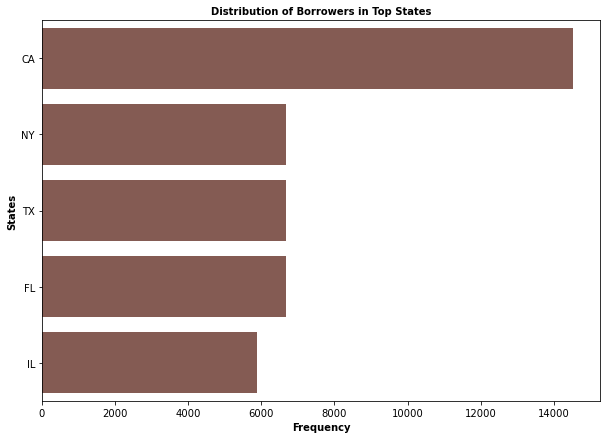

In [40]:
#Top distribution of borrowers by states
plt.figure(figsize = [10, 7])
color_pal = sb.color_palette()[5]
order = df_clean['BorrowerState'].value_counts().iloc[:5].index
sb.countplot(data= df_clean, y= 'BorrowerState', color = color_pal, order = order)
plt.title("Distribution of Borrowers in Top States",fontdict = {'weight': 'bold', 'fontsize':10})
plt.xlabel("Frequency", fontdict = {'weight': 'bold', 'fontsize':10})
plt.ylabel("States", fontdict = {'weight': 'bold', 'fontsize':10})

-  CA (California) has the highest borrowers' on the list

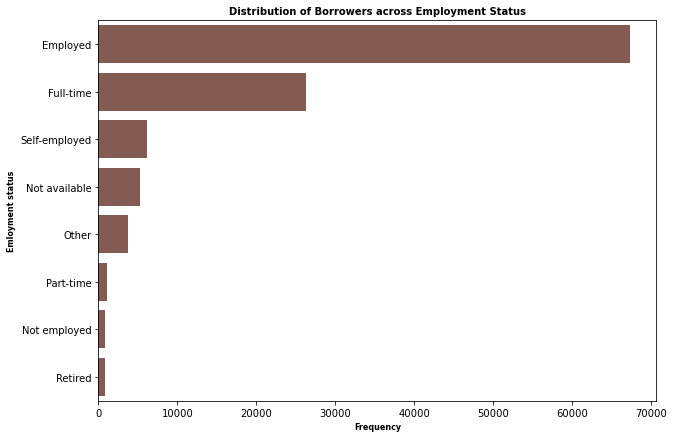

In [41]:
#Distribution of the borrowers across the EmploymentStatus categories
plt.figure(figsize = [10, 7])
color_pal = sb.color_palette()[5]
order_type = df_clean['EmploymentStatus'].value_counts().index
sb.countplot(data= df_clean, y= 'EmploymentStatus', color = color_pal, order = order_type)
plt.title("Distribution of Borrowers across Employment Status",fontdict = {'weight': 'bold', 'fontsize':10})
plt.xlabel("Frequency",fontdict = {'weight': 'bold', 'fontsize':8})
plt.ylabel("Emloyment status",fontdict = {'weight': 'bold', 'fontsize':8});

- Employed people collected the highest number of loan

Text(0, 0.5, 'Occupation')

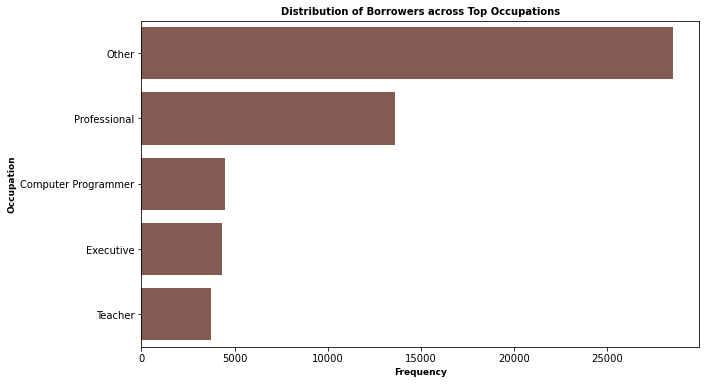

In [43]:
#borrowers Occupation
plt.figure(figsize = [10, 6])
color_pal = sb.color_palette()[5]
order = df_clean['Occupation'].value_counts().iloc[:5].index
sb.countplot(data= df_clean, y= 'Occupation', color = color_pal, order = order)
plt.title("Distribution of Borrowers across Top Occupations",fontdict = {'weight': 'bold', 'fontsize':10})
plt.xlabel("Frequency",fontdict = {'weight': 'bold', 'fontsize':9})
plt.ylabel("Occupation",fontdict = {'weight': 'bold', 'fontsize':9})

- Other occupations not specified tops of the distribution list by occupation.

In [52]:
def distribution (data, onx, sides_to_remove, title, fig_width, fig_height, rotation,\
          sort_as_ordinal = None, rotatex = None, subplot = None):
    value = df_clean[data].value_counts().index.to_list() if sort_as_ordinal == None else\
     df_clean[data].value_counts().sort_index().index.to_list()
    fig = plt.figure(figsize = (fig_width, fig_height))
    ax1 = plt.subplot(111) if subplot == None else plt.subplot(subplot)
    ax1.set_title(title, fontdict = {'color':'blue', 'fontsize':20,\
                                                    'fontweight': 'bold'}, pad = 10)
    if onx:
        #if the categorical variale should be on x-axis
        sb.countplot(x = data, data = df_clean, order = value, color = 'blue', ax = ax1)
        for i in range(len(value)):
            distribution = df_clean[data].value_counts()[value[i]]
            percent = (distribution/df_clean[data].shape[0]) * 100
            plt.text(x = i, y = distribution , s = '{:0.0f}% ({c})'.format(percent, c = distribution), rotation = 45 if\
                     rotation else 0, fontsize = 16, ha ='center') # to print the proportions in percentage 
        plt.xlabel(f'{data}', fontdict = {'weight': 'bold', 'size' : 16})
        plt.ylabel(f'Frequency of {data}', fontdict = {'weight': 'bold', 'size' : 16})
        plt.xticks(fontsize=16, rotation = 0 if rotatex == False else 90);
        plt.yticks(fontsize=16)
    else:
        sb.countplot(y = data, data = df_clean, order = value, color = 'blue', ax = ax1)
        plt.ylabel(f'{data}', fontdict = {'weight': 'bold', 'size' : 16})
        plt.xlabel(f'Frequency of {data}', fontdict = {'weight': 'bold', 'size' : 16})
        for i in range(len(value)):
            distribution = df_clean[data].value_counts()[value[i]]
            percent = (distribution/df_clean[data].shape[0]) * 100
            plt.text(y = i, x = distribution , s = '{:0.0f}% ({c})'.format(percent, c = distribution), rotation = 45 if\
                     rotation else 0, fontsize = 16, ha = 'left')
    for i in sides_to_remove:
        ax1.spines[i].set_visible(False)

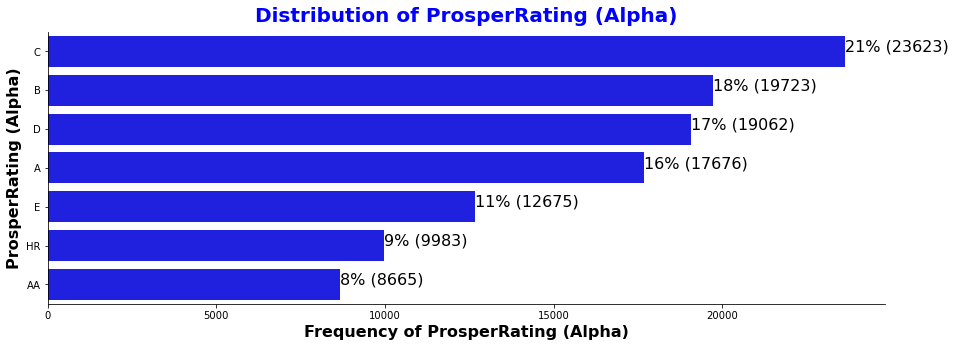

In [45]:
#Distribution of ProsperRating (Alpha)

sides = ['top', 'right']
distribution(data = 'ProsperRating (Alpha)', onx = False, sides_to_remove = sides,\
      title ='Distribution of ProsperRating (Alpha)', fig_width = 15, fig_height = 5, rotation = False)

- ProsperRating (Alpha) of C occurs the most and Nc occurs the least

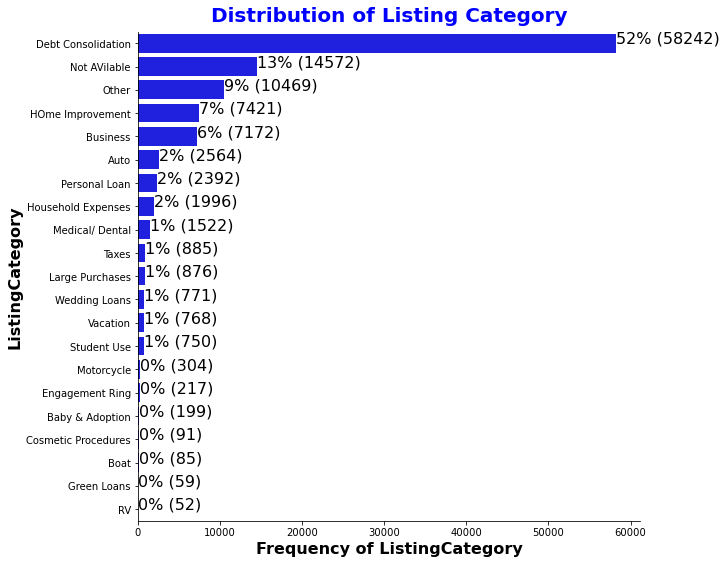

In [46]:
#Distribution of ListingCategory
sides = ['top', 'right']
distribution(data = 'ListingCategory', onx = False, sides_to_remove = sides,\
      title ='Distribution of Listing Category', fig_width = 9, fig_height = 9, rotation = False)

- Most borrowers had taken a loan for debt Consolidation.

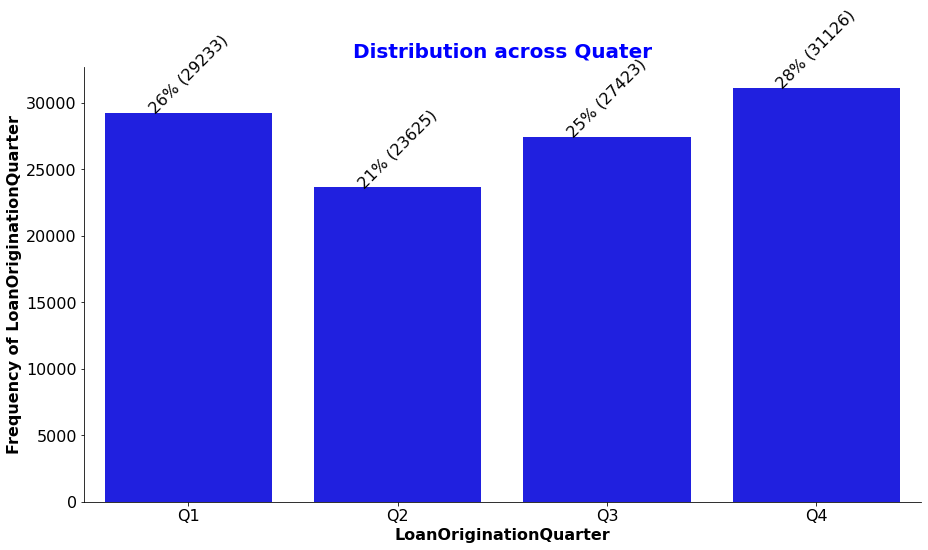

In [54]:
##plot of LoanOriginationQuarter
sides = ['right', 'top']
distribution(data = 'LoanOriginationQuarter', onx = True, sides_to_remove = sides, title ='Distribution across Quater',\
     fig_width = 15, fig_height = 8, rotation = True, sort_as_ordinal = True, rotatex = False)

- There is no much difference in the amount of loans originated in each quarter, but Q4 had the highest

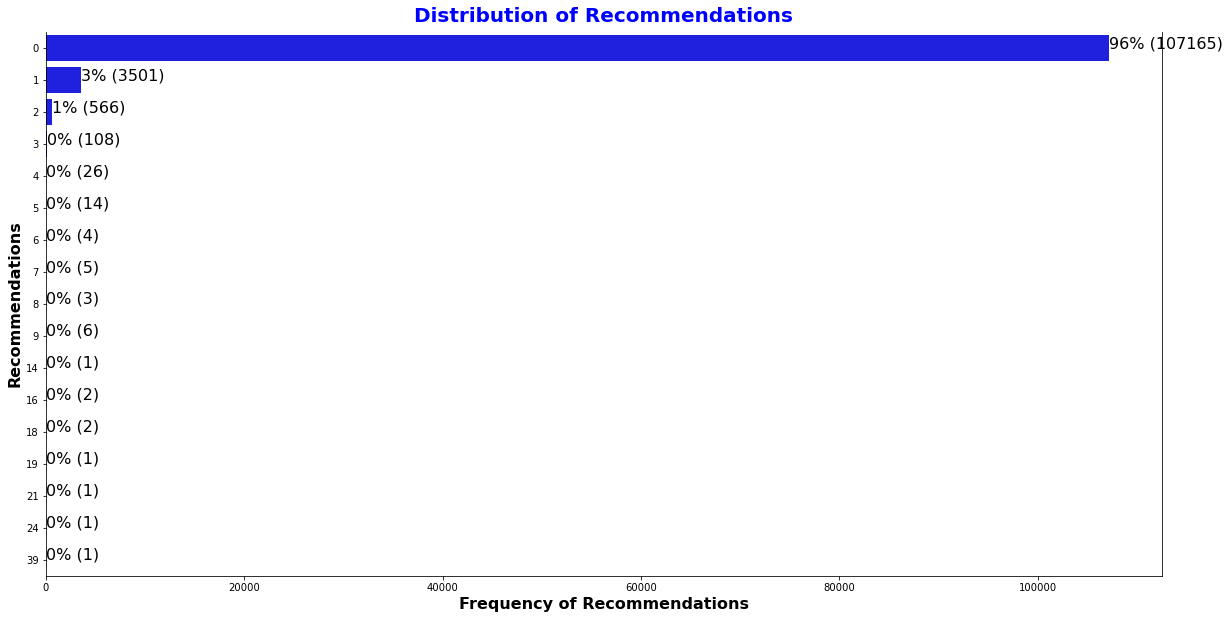

In [55]:

distribution(data = 'Recommendations', onx = False, sides_to_remove = ['top'], title ='Distribution of Recommendations',\
     fig_width = 20, fig_height = 10, rotation = False, sort_as_ordinal = True, rotatex = False)

- Most borrowers had no recommendations

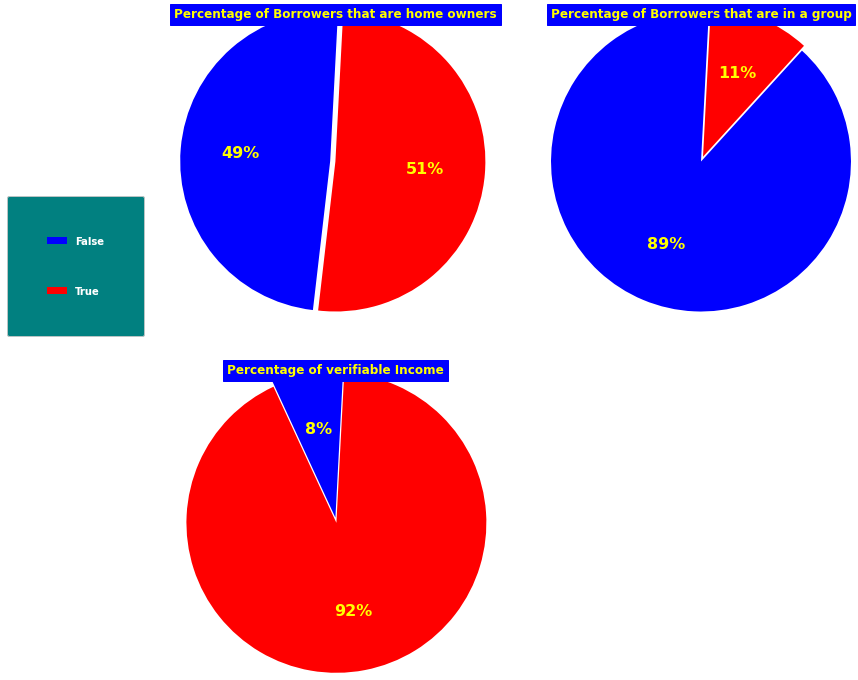

In [56]:
f, ax = plt.subplots(2, 2, figsize = (10,10))
color = ['blue', 'red']
label = [ 'False','True']

def proportion_pie(data, axis_row, axis_column, title, explode, rotation1, rotate_index, wedgeprops = None,):
    
    '''To plot distributions of categorical data in form of proportion
    
    data: str, The elements of the categorical data,
    axis_row: int, row position to plot on,
    axis_column: int, column position to plot on,
    title: str, title of plot,
    explode: list, explode values  to pass to pie plot,
    rotation1: bool, If all texts should be rotated,
    rotate_index: int, The index of the text to rotate if rotation1 is false,
    wedgeprops: dict, The width of each proportion, to help form a donut chart
    '''
    
    data = df_clean[data].value_counts().sort_index()
    axes = ax[axis_row][axis_column]
    axes.set_title(title, backgroundcolor = 'blue',\
         fontdict = {'fontweight': 'bold', 'color': 'yellow'}, pad = 50)
    explode = explode
    if wedgeprops != None:
        patches, texts, autotexts = axes.pie(data, colors = color, autopct = '%0.0f%%', startangle = 87,
        explode = explode, wedgeprops = wedgeprops,\
            textprops = {'color': 'yellow', 'fontweight' : 'bold','fontsize':16},  radius = 2);
    else:
        patches, texts, autotexts = axes.pie(data, colors = color, autopct = '%0.0f%%', startangle = 87,
        explode = explode, textprops = {'color': 'yellow', 'fontweight' : 'bold','fontsize':16},  radius = 2);
    if rotation1:
        [text.set_rotation(0) for text in autotexts] 
    else:
        autotexts[rotate_index].set_rotation(0)
    legend_properties = {'weight': 'bold'}
    f.legend(label, loc = 4 , facecolor = 'teal',borderpad = 4, labelspacing = 4,\
            fontsize = 16, prop = legend_properties, labelcolor = 'white',\
            bbox_to_anchor = (0, 0.5));
    plt.subplots_adjust(wspace = 0.9, hspace = 0.9)
    ax[1][1].set_visible(False)
    return axes

#percentage of IsBorrowerHomeowner
proportion_pie('IsBorrowerHomeowner', 0, 0, 'Percentage of Borrowers that are home owners', [0.07, 0],\
   True,{'width': 1.0})

#percentage of CurrentlyInGroup
proportion_pie('CurrentlyInGroup', 0, 1, 'Percentage of Borrowers that are in a group', [0, 0.07],\
              False, 1)

#percentage of IncomeVerifiable
proportion_pie('IncomeVerifiable', 1, 0, 'Percentage of verifiable Income', [0, 0.07],\
              False, 0)

plt.show()

- There is little change in percentage between homeowners and renters, and more borrowers own homes.
- Only 10% of borrowers are in groups.
- 92% of borrowers had incomes that could be verified.

Text(0.5, 0, 'Debt To Income Ratio')

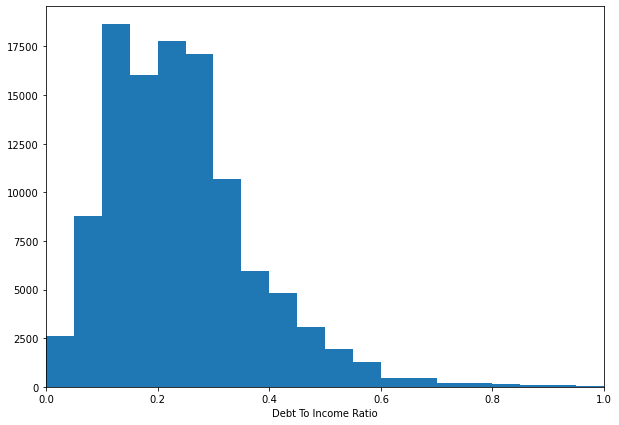

In [58]:
# distribution of the Borrowers DebtToIncomeRatio
plt.figure(figsize = [10, 7])
bin= np.arange(0, df_clean['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.hist(data= df_clean, x = 'DebtToIncomeRatio', bins= bin)
plt.xlim(0, 1)
plt.xlabel('Debt To Income Ratio')

- Debt to income ratio is right skewed

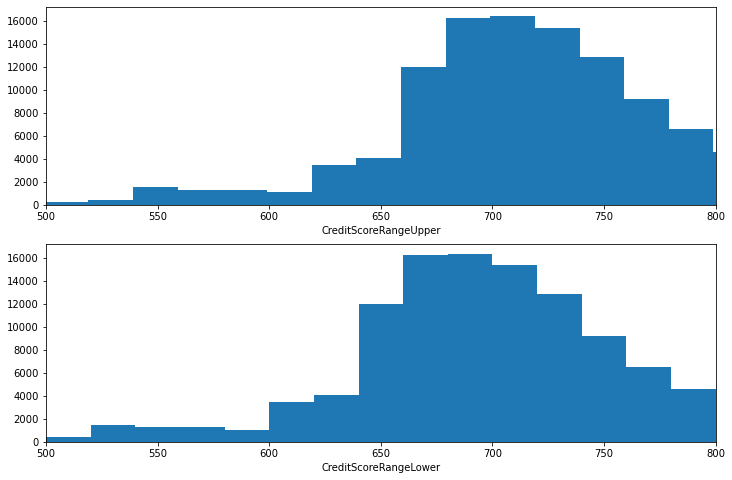

In [62]:
# using subplots to create Histograms showing the distribution of the Credit Score Upper and lower Range
fig, ax = plt.subplots(nrows=2, figsize = [12,8])
variables = ['CreditScoreRangeUpper', 'CreditScoreRangeLower']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_clean[var]), max(df_clean[var])+20, 20)
    ax[i].hist(data = df_clean, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_xlim(500, 800)

plt.show()


- CreditScoreRangeUpper has very similar distribution to CreditScoreRangeLower

In [63]:
def hist(fig_width, fig_height, data, number_of_bins, title, more_than_a_subplot = False, \
               use_another_data = False, another_data = None,):
    
    plt.figure(figsize = (fig_width, fig_height))
    ax = plt.subplot(121)
    data_to_use = df_clean
    bin_number = data_to_use[data[0]].max() / number_of_bins
    bins = np.arange(data_to_use[data[0]].min(), data_to_use[data[0]].max() +bin_number, bin_number)
    sb.histplot(x = data[0], data = data_to_use, ax = ax, bins = bins)
    ax.spines['top'].set_visible(False)
    plt.title(title if isinstance(title, str) else title[0], 
              fontdict = {'fontsize': 20})
    plt.xlabel(f'{data[0]}', fontdict = {'weight': 'bold', 'fontsize':16})
    plt.ylabel(f'frequency of {data[0]}', fontdict = {'weight': 'bold','fontsize':16})
    
    if more_than_a_subplot:
        ax = plt.subplot(122)
        if use_another_data:
            data_to_use = another_data
        else:
            data_to_use = data_copy
        bin_number = data_to_use[data[1]].max() / number_of_bins
        bins = np.arange(data_to_use[data[1]].min(), data_to_use[data[1]].max() +bin_number, bin_number)
        sb.histplot(x = data[1], data = data_to_use, ax = ax, bins = bins)
        ax.spines['top'].set_visible(False)
        plt.title(title[1], fontdict = {'fontsize': 40})
        plt.xlabel(f'{data[1]}', fontdict = {'weight': 'bold','fontsize':16})
        plt.ylabel(f'frequency of {data[1]}', fontdict = {'weight': 'bold','fontsize':16})
    plt.subplots_adjust(wspace = 0.9)
    plt.tight_layout()

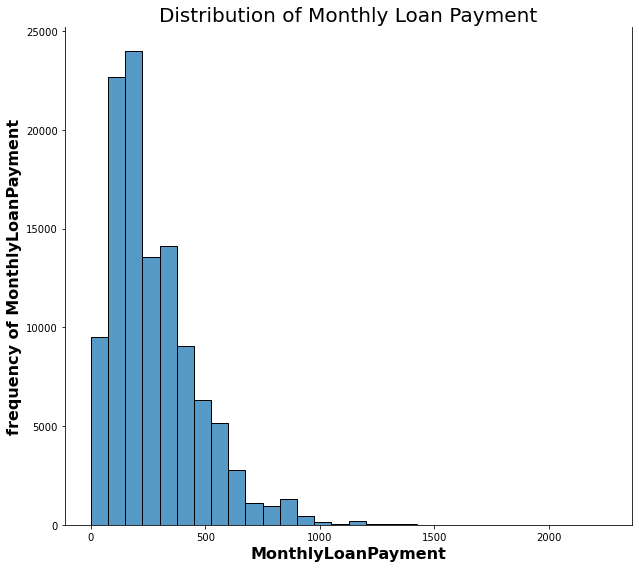

In [65]:
# distribution of MonthlyLoanPayment
hist(fig_width = 17, fig_height = 8, data = ['MonthlyLoanPayment'],\
           number_of_bins = 30, title = 'Distribution of Monthly Loan Payment',\
                         )

- Monthly Loan Payment is skewed

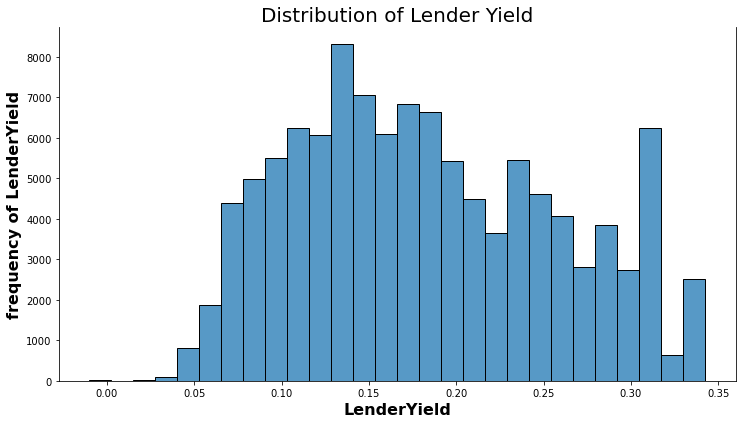

In [68]:
# Histogram showing the distribution of Lender Yield
hist(fig_width = 20, fig_height = 6, data = ['LenderYield'],\
           number_of_bins = 27, title = 'Distribution of Lender Yield',\
                         )

- The Lender Yield is a unimodal distribution with the highest close to 0.15 with some  outliers less than 0.05

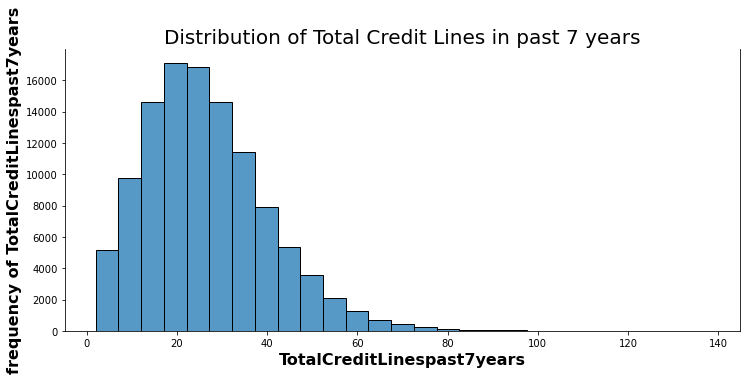

In [69]:
# distribution of Total Credit Lines past 7years

hist(fig_width = 20, fig_height = 5, data = ['TotalCreditLinespast7years'],\
           number_of_bins = 27, title = 'Distribution of Total Credit Lines in past 7 years',\
                         )

- Total credit lines between 20 and 30 are more but the distribution is skewed a little

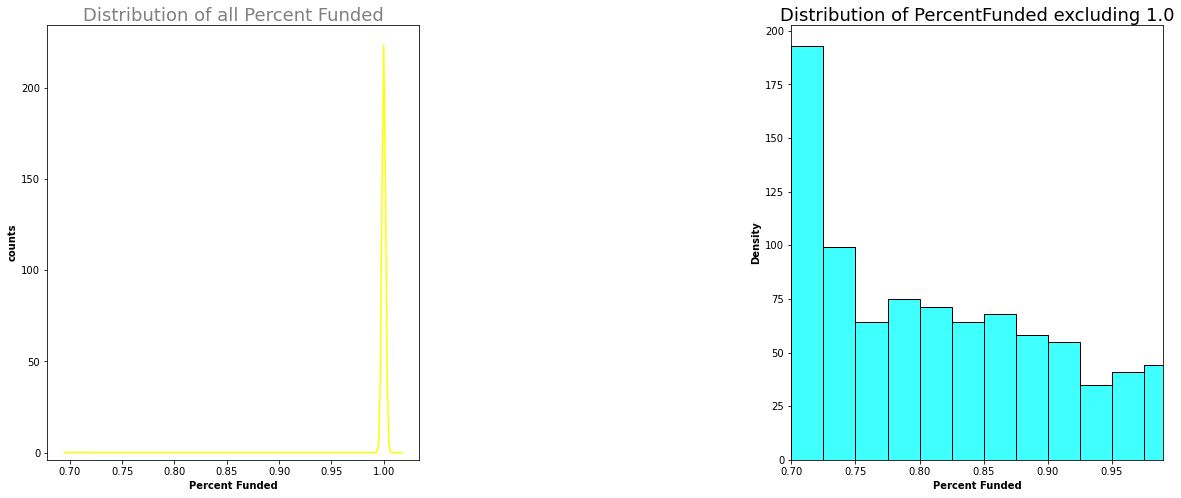

In [70]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sb.kdeplot(data = df_clean['PercentFunded'], color = 'yellow')
plt.title('Distribution of all Percent Funded', fontdict = {'fontsize': 18, 'color': 'grey'}, pad = 0.4)
plt.xlabel('Percent Funded', fontdict = {'weight': 'bold'})
plt.ylabel('counts', fontdict = {'weight': 'bold'})
plt.ylim(-4);

#Because the proportion of 1.0 is very large, I want to view the distribution of other percent funded in another subplot
plt.subplot(122)
not_including_1 = df_clean[df_clean['PercentFunded'] < 1]
bins = np.arange(not_including_1['PercentFunded'].min(), not_including_1['PercentFunded'].max() + 0.025, 0.025)
sb.histplot(data =  not_including_1, x = 'PercentFunded', bins = bins, color = 'aqua')
plt.title('Distribution of PercentFunded excluding 1.0', fontdict = {'fontsize': 18, 'color': 'black'}, pad = 0.4)
plt.xlim(0.7,0.99,0.25)
plt.xlabel('Percent Funded', fontdict = {'weight': 'bold'})
plt.ylabel('Density', fontdict = {'weight': 'bold'})

plt.subplots_adjust(wspace = 1.0)

In [71]:
#check the percentage of loans that has PercentFunded of 1

(df_clean['PercentFunded'].value_counts().iloc[0]/ df_clean['PercentFunded'].shape[0]) * 100

99.2199772007145

- The `PercentFunded` feature is highly skewed with 99.18% of the data being 1.0, hence performing transformation on the feature had no effect on the skewness. But from the observation, 99.18 percent of loans were fully funded.
Of the 0.82% left, most of the loans were 70% funded

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- CA (California) has the highest borrowers' on the list
- Employed people collected the highest number of loan
- Other occupations not specified tops of the distribution list by occupation
- ProsperRating (Alpha) of C occurs the most and Nc occurs the least
- Most borrowers had taken a loan for debt Consolidation.
- There is no much difference in the amount of loans originated in each quarter, but Q4 had the highest
- Most borrowers had no recommendations
- There is little change in percentage between homeowners and renters, and more borrowers own homes.
- Only 10% of borrowers are in groups.
- 92% of borrowers had incomes that could be verified.
- Debt to income ratio is right skewed
- CreditScoreRangeUpper has very similar distribution to CreditScoreRangeLower
- Monthly Loan Payment is skewed
- The Lender Yield is a unimodal distribution with the highest close to 0.15 with some  outliers less than 0.05
- Total credit lines between 20 and 30 are more but the distribution is skewed a little



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The monthly loan payment was skewed and It almost seemed there was an outlier between values 1500 and 2000
- To better understand the distribution of the data and the skewed nature of the debt-to-income ratio, I performed log transformations on the data.

### Bivariate Exploration

#### Investigating the relationships between pairs of variables of interest in the data.

Text(0.5, 1.0, 'correlation greater than 0.4')

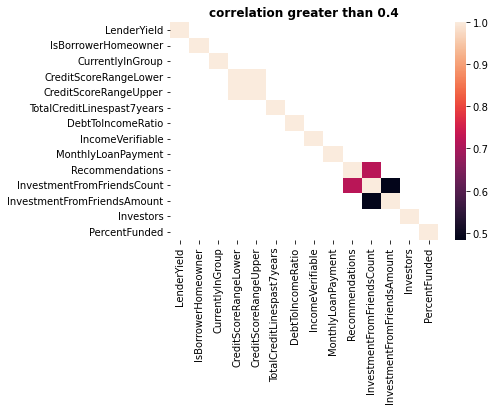

In [76]:
#check for columns that have high positive correlation
a = df_clean.corr()[df_clean.corr() > 0.4]
sb.heatmap(a)
plt.title('correlation greater than 0.4', fontdict = {'weight': 'bold'})

- Recommendation and InvestorsFromFriendsCount
- InvestorsFromFriendsCount and InvestorsFromFriendsAmount as expected

Text(0.5, 1.0, 'correlation less than 0.4')

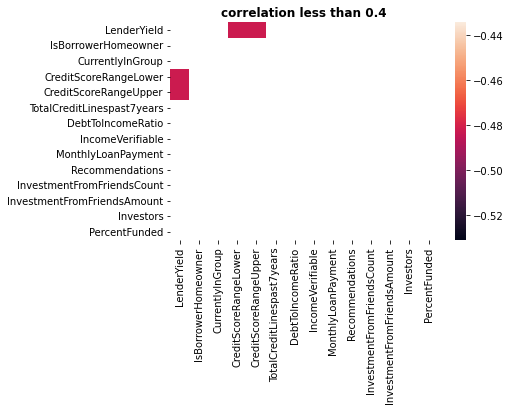

In [75]:
#check for columns that have high negative correlation

a = df_clean.corr()[df_clean.corr() < -0.4]
sb.heatmap(a)

plt.title('correlation less than 0.4', fontdict = {'weight': 'bold'})

- There is reasonable correlation between LenderYield and CreditScoreRangeUpper, CreditScoreRangeLower

### Correlation Analysis

Text(0.5, 1.0, 'Pairplot of other features against Percent Funded')

<Figure size 720x720 with 0 Axes>

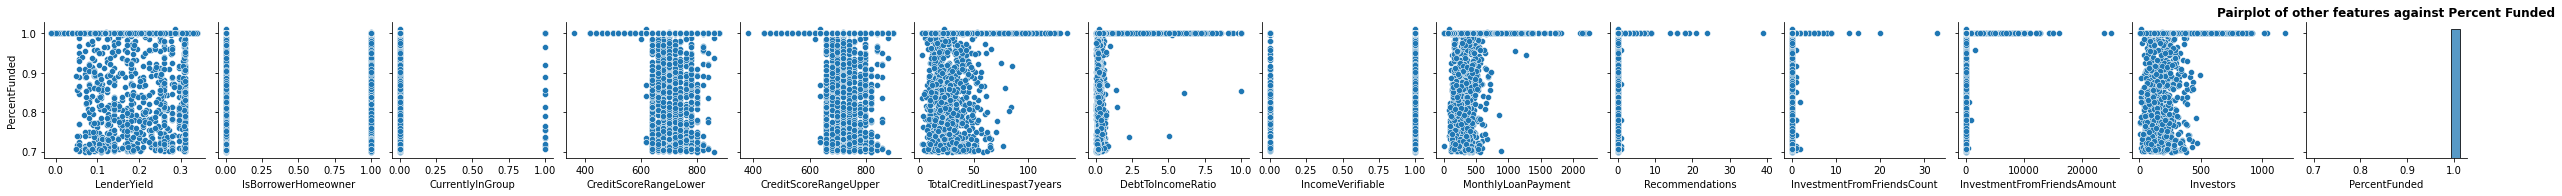

In [77]:
#correlation with percentFunded

plt.figure(figsize = (10,10))
g = sb.pairplot(data = df_clean, y_vars = 'PercentFunded')
plt.title('Pairplot of other features against Percent Funded', fontdict ={'weight': 'bold'})

- Percent funded has no correlation with other columns

In [78]:
def boxplots(fig_width, fig_height,  cat_data, num_data, data, title,
            multiple_subplots = False, use_another_data = False, another_data = None):
    
    plt.figure(figsize = (fig_width, fig_height))
    plt.subplot(211)
    sb.boxplot(x = cat_data[0], y = num_data[0], data = df_clean, color = 'teal')
    plt.xticks(rotation = 90)
    plt.title(title[0], fontdict = {'fontweight': 'bold', 'fontsize' : 24})
    
    if multiple_subplots: #If there should be another subplot
        plt.subplot(212)
        if use_another_data:#If another data should be used
            data_to_use = another_data
        else:
            data_to_use = data
        sb.boxplot(x = cat_data[0], y = num_data[0], data = data_to_use, color = 'teal')
        plt.title(title[1], fontdict = {'fontweight': 'bold', 'fontsize' : 24})
        plt.xticks(rotation = 90);
        plt.subplots_adjust(hspace = 1.4)
    plt.xlabel(f'{cat_data[0]}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'{num_data[0]}', fontdict = {'weight': 'bold'})

In [83]:
def full_funding(cat_data, title, fig_size = None):
    
    if fig_size != None:
        plt.figure(figsize = fig_size)
    full_funding = df_clean[df_clean['PercentFunded'] == 1]# data of 100% funding
    sb.countplot(x = cat_data, data = full_funding, color = 'red')
    plt.xticks(rotation = 90);
    plt.title(f'Counts of {title} that had full percent funding', 
             fontdict = {'fontweight': 'bold', 'fontsize' : 24});
    plt.xlabel(f'{cat_data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'Counts of {cat_data[0]} for loans with full funding', fontdict = {'weight': 'bold'})

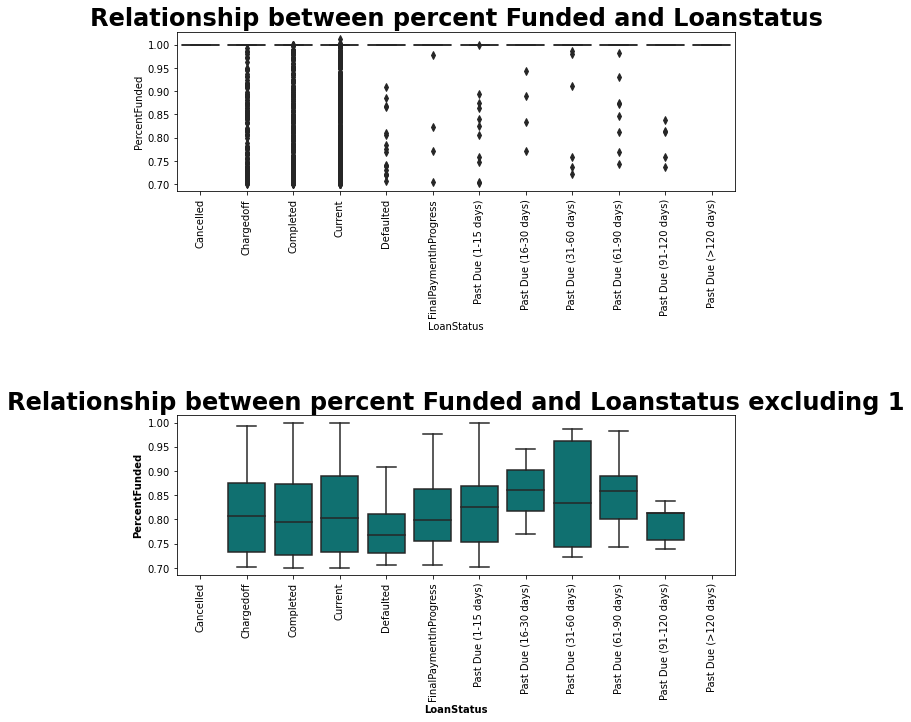

In [81]:
#Relationship between percentFunded and Loanstatus

not_including_1 = df_clean[df_clean['PercentFunded'] < 1]
boxplots(10, 10, ['LoanStatus'], ['PercentFunded'], df_clean,
         ['Relationship between percent Funded and Loanstatus', 
          'Relationship between percent Funded and Loanstatus excluding 1'],
          multiple_subplots = True, \
         use_another_data = True, another_data = not_including_1)

- Loans that are not fully funded with Loan status of past Due(31-60 days) have larger range of PercentFunded than other status

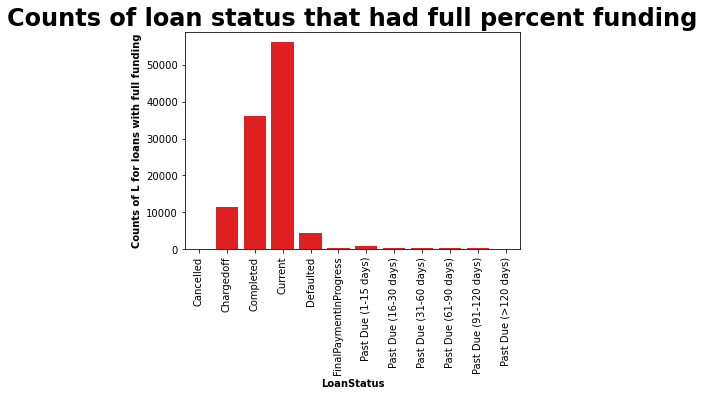

In [84]:
#percent Funded and Loans tatus for fully funded loans

full_funding('LoanStatus', 'loan status')

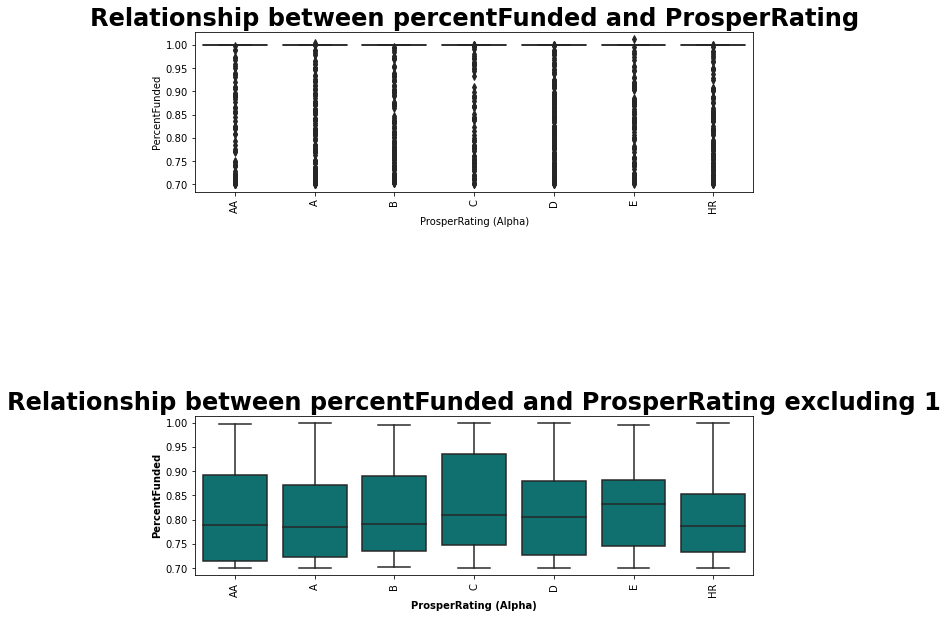

In [61]:
#Relationship between percentFunded and Loanstatus ProsperRating (Alpha)

not_including_1 = df_loan_copy[df_loan_copy['PercentFunded'] < 1]
boxplots(10, 10, ['ProsperRating (Alpha)'], ['PercentFunded'], df_loan_copy,
         ['Relationship between percentFunded and ProsperRating', 
          'Relationship between percentFunded and ProsperRating excluding 1'],
          multiple_subplots = True, \
         use_another_data = True, another_data = not_including_1)

- Rating C has the highest range of percent funded not fully funded and HR has the lowest range

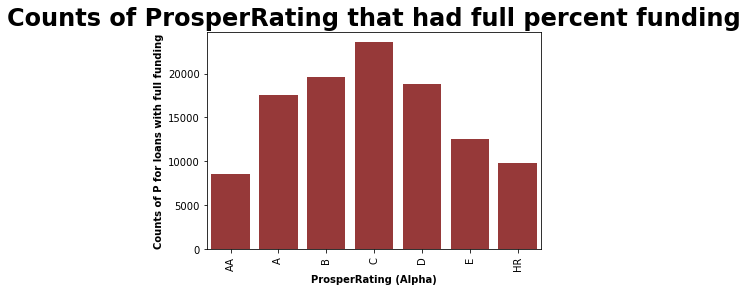

In [62]:
#Relationship between percentFunded and ProsperRating (Alpha) for fully funded loans

full_funding('ProsperRating (Alpha)', 'ProsperRating')

- For fully funded loans, Most Loans had rating 'C' and fewer had 'AA'

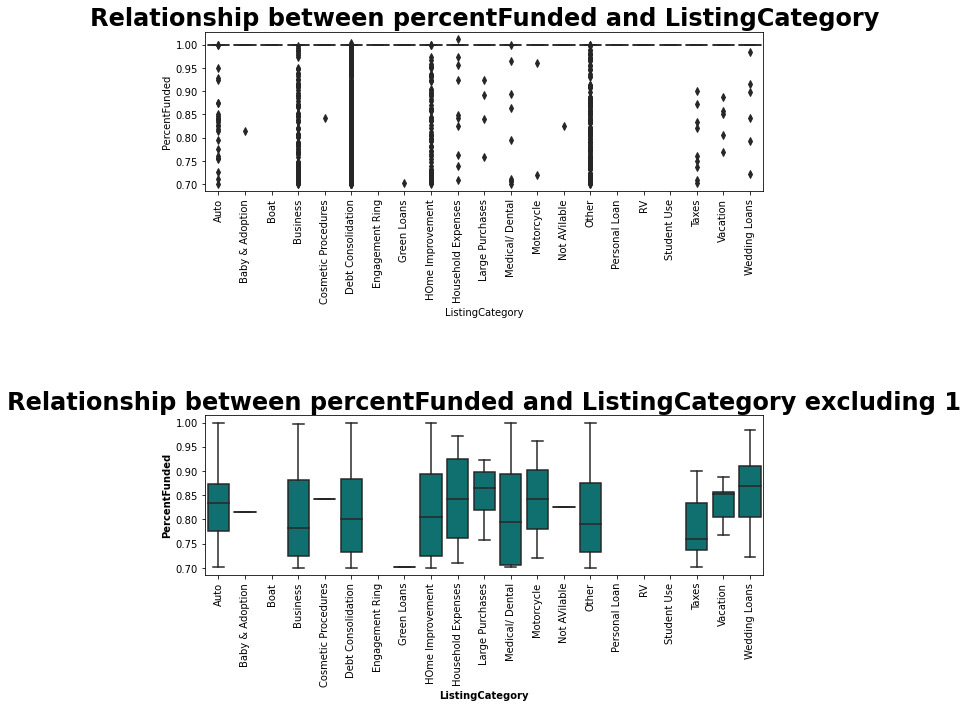

In [63]:
#Relationship between percentFunded and ListingCategory

not_including_1 = df_loan_copy[df_loan_copy['PercentFunded'] < 1]
boxplots(10, 10, ['ListingCategory'], ['PercentFunded'], df_loan_copy,
         ['Relationship between percentFunded and ListingCategory', 
          'Relationship between percentFunded and ListingCategory excluding 1'],
          multiple_subplots = True, \
         use_another_data = True, another_data = not_including_1)

- For not fully funded loans; Loans for HomeImprovement, Business, Debt Consolidation, Household Expenses, Medical/Dental and other have the largest range of Percent Funded, while Loans for baby and Adoption, Cosmetic Procedures, Green Loans,Not available had the least range with their values being around 81%, 85%, 71% and 83% respectively

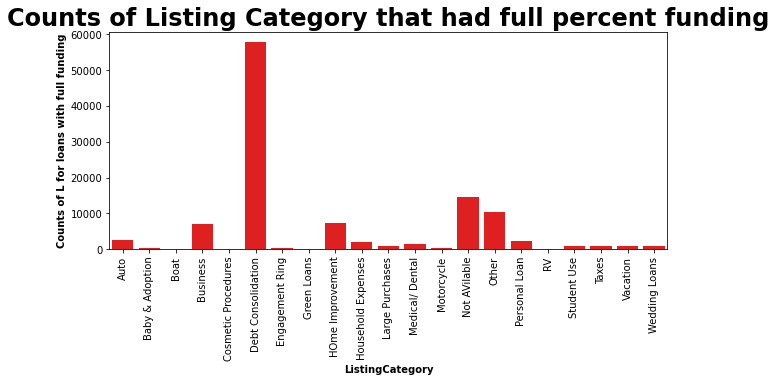

In [86]:
#Relationship between percentFunded and ListingCategory for fully funded loans

full_funding('ListingCategory', 'Listing Category', (10,4))

- For loans fully funded, Loans for Debt Consolidation had the highest frequency.

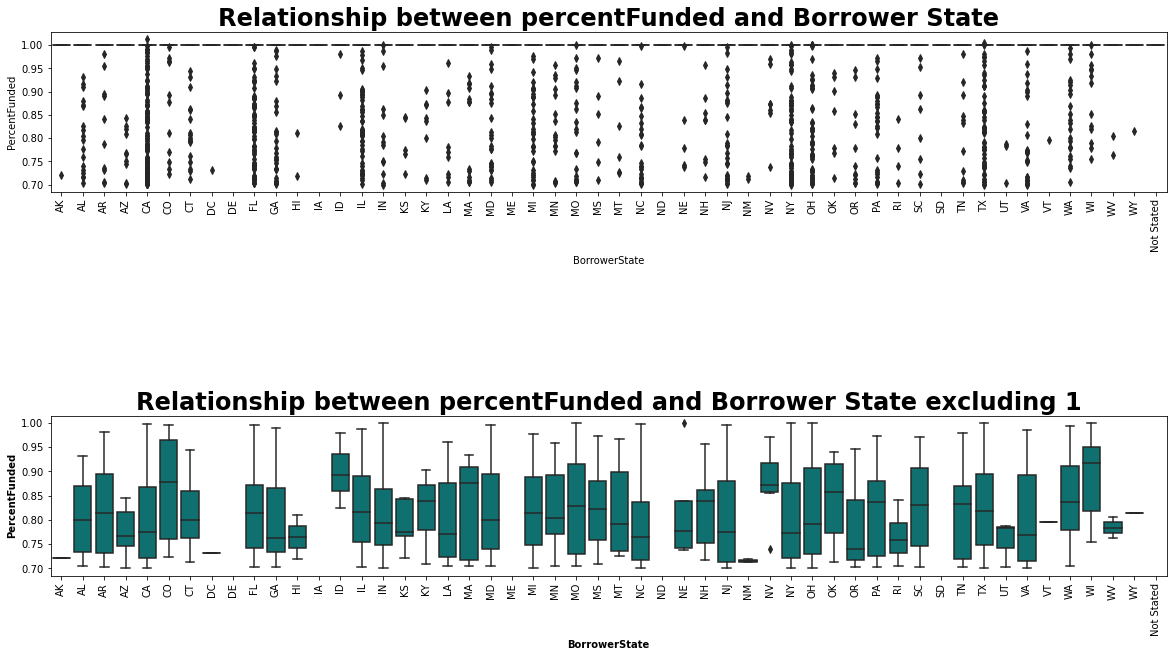

In [87]:
#Relationship between percentFunded and BorrowerState

not_including_1 = df_clean[df_clean['PercentFunded'] < 1]
boxplots(20, 10, ['BorrowerState'], ['PercentFunded'], df_clean,
         ['Relationship between percentFunded and Borrower State', 
          'Relationship between percentFunded and Borrower State excluding 1'],
          multiple_subplots = True, \
         use_another_data = True, another_data = not_including_1)

- For not fully loans, Maryland, North Carolina, New Jersey,New York, Washington had the largest range of Percent funded

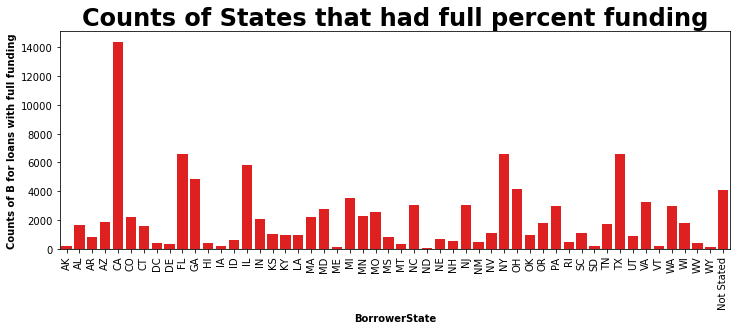

In [88]:
#percent Funded and Borrower State for fully funded loans

full_funding('BorrowerState', 'States', (12, 4))

- California had the highest frequency of fully funded loans

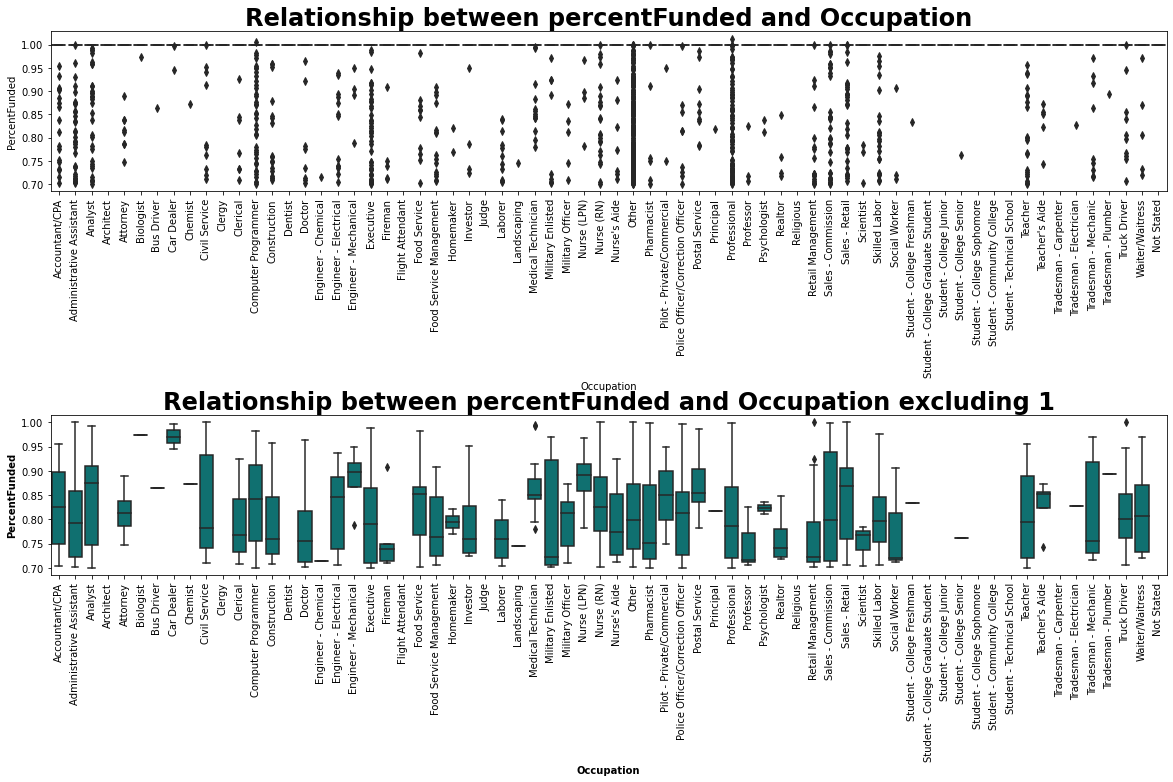

In [89]:

#Relationship between percentFunded and Occupation

boxplots(20, 10, ['Occupation'], ['PercentFunded'], df_clean,
         ['Relationship between percentFunded and Occupation', 
          'Relationship between percentFunded and Occupation excluding 1'],
          multiple_subplots = True, \
         use_another_data = True, another_data = not_including_1)

- For not fully funded loans, Car dealer had a low range of Percent Funded but had high funding, Civil Service, Sales-Commission had high Funding range

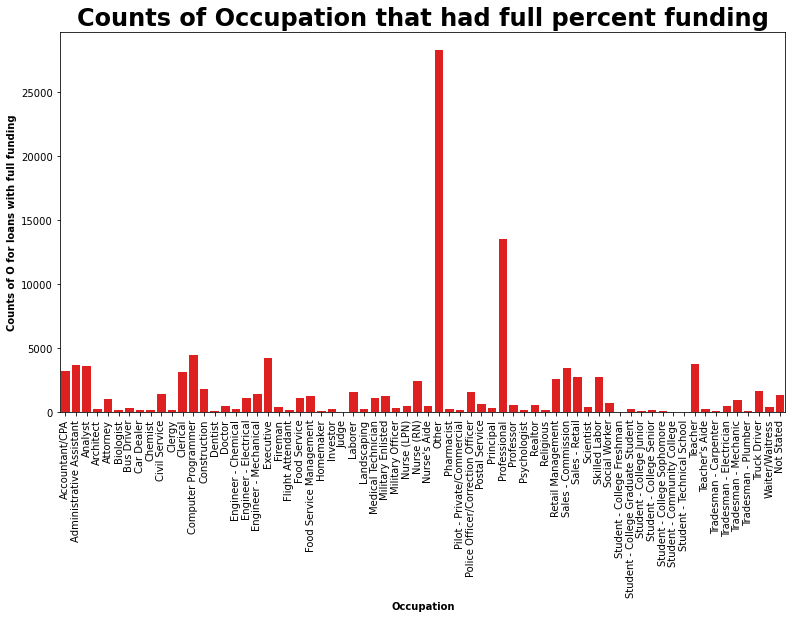

In [90]:
#Relationship between percentFunded and Occupation for fully funded loans

full_funding('Occupation', 'Occupation', (13,7))

- Although Other and Professional had highest frequency of full funding, Teacher, Executive, COmputer Programming also had relatively high frequency

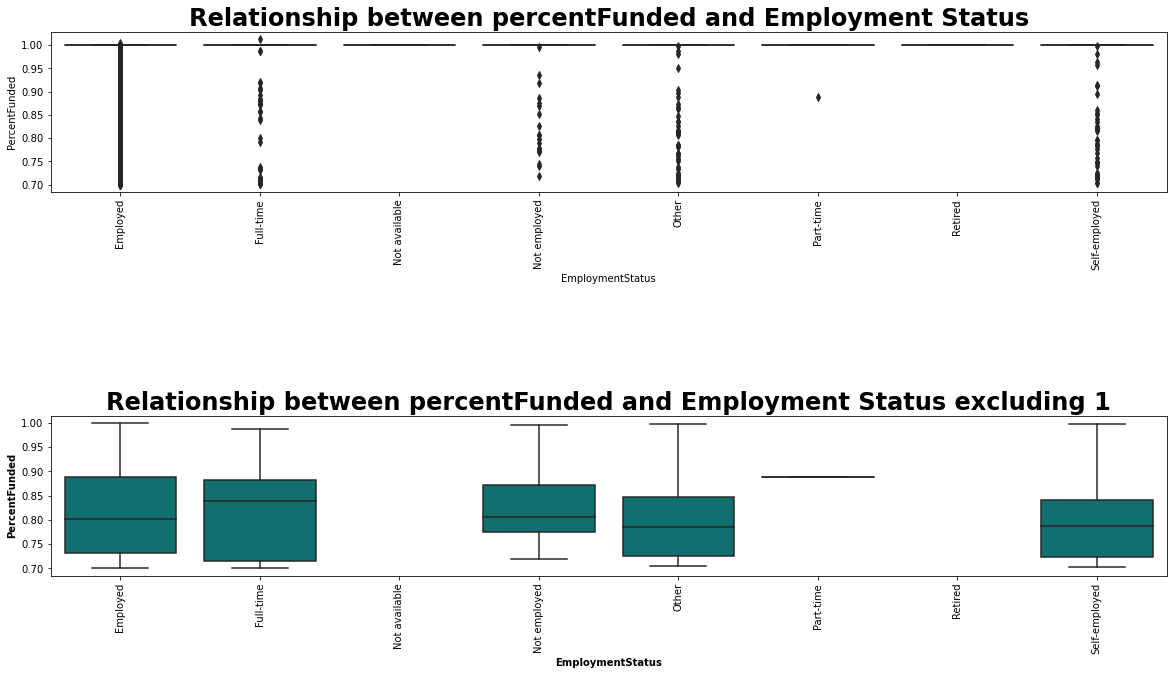

In [91]:
# percent Funded and Employment Status

boxplots(20, 10, ['EmploymentStatus'], ['PercentFunded'], df_clean,
         ['Relationship between percentFunded and Employment Status', 
          'Relationship between percentFunded and Employment Status excluding 1'],
          multiple_subplots = True, \
         use_another_data = True, another_data = not_including_1)

- For not fully funded loans, Part-time had fundings of 91%, Full-time and employed had higher range

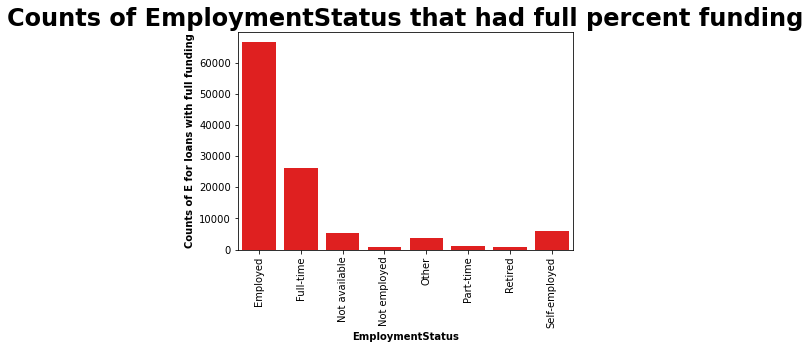

In [92]:
#Relationship between percentFunded and EmploymentStatus for fully funded loans

full_funding('EmploymentStatus', 'EmploymentStatus')

- Employed and Full time had relatively high frequency of Fully funded loans

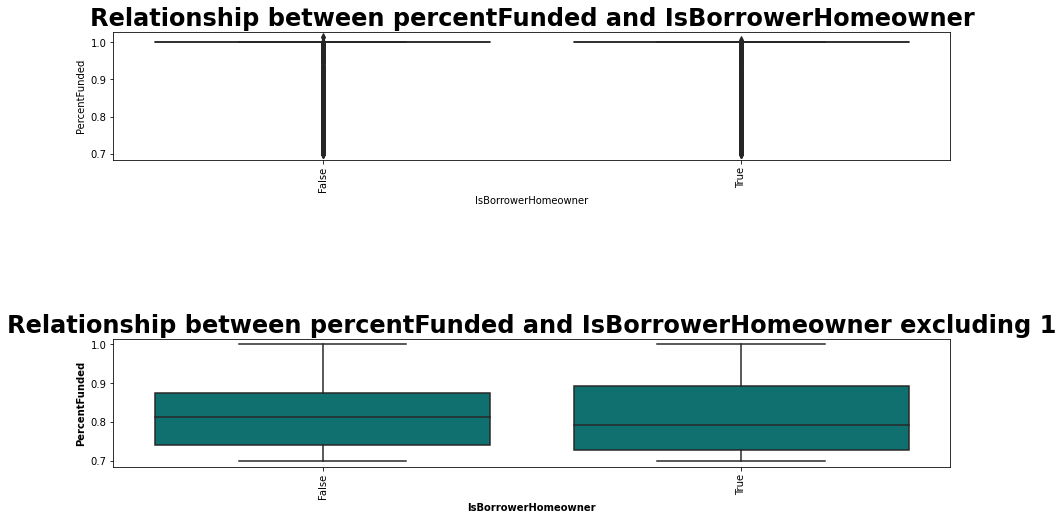

In [93]:
#Relationship between percentFunded and IsBorrowerHomeowner 

boxplots(15, 8, ['IsBorrowerHomeowner'], ['PercentFunded'], df_clean,
         ['Relationship between percentFunded and IsBorrowerHomeowner', 
          'Relationship between percentFunded and IsBorrowerHomeowner excluding 1'],
          multiple_subplots = True, \
         use_another_data = True, another_data = not_including_1)

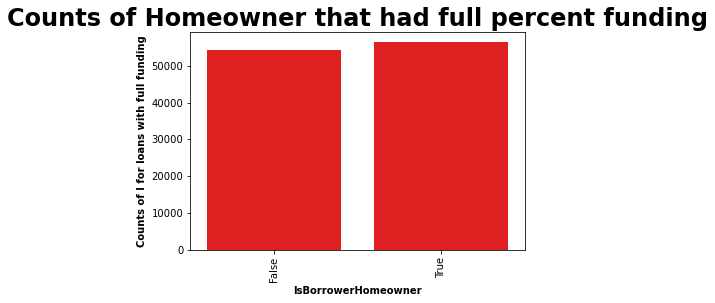

In [94]:
#Relationship between percentFunded and IsBorrowerHomeowner for fully funded loans

full_funding('IsBorrowerHomeowner', 'Homeowner')

- Home borrowers not-fully funded loans had a higher range of percent funding and higher frequency of full funding

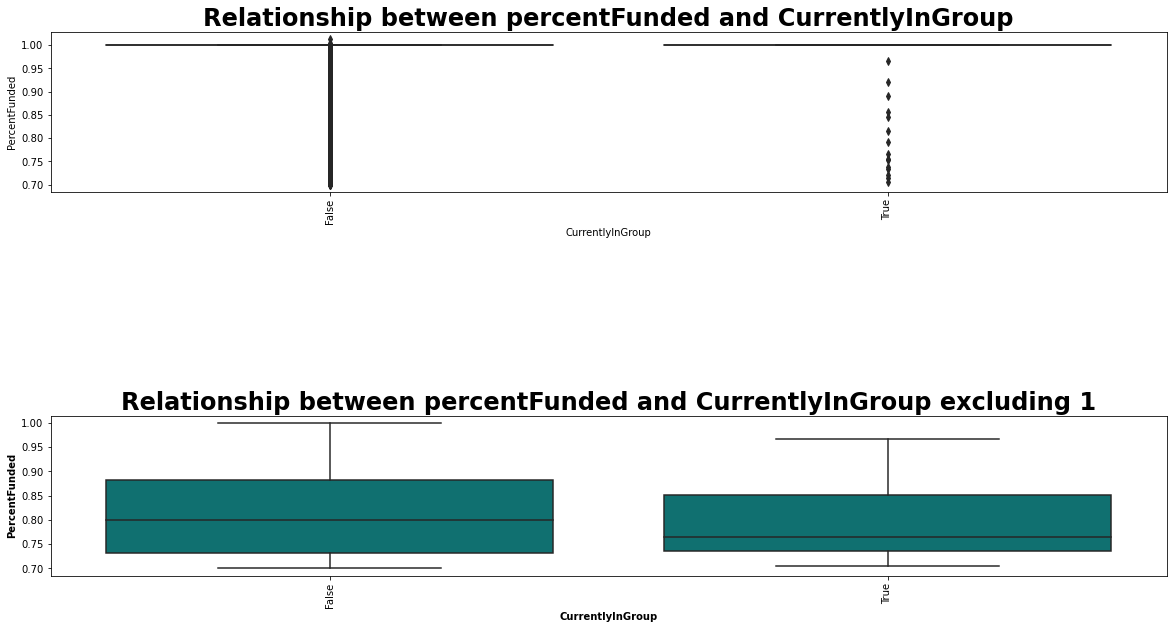

In [95]:
# percent Funded and CurrentlyInGroup

boxplots(20, 10, ['CurrentlyInGroup'], ['PercentFunded'], df_clean,
         ['Relationship between percentFunded and CurrentlyInGroup', 
          'Relationship between percentFunded and CurrentlyInGroup excluding 1'],
          multiple_subplots = True, \
         use_another_data = True, another_data = not_including_1)

- Borrowers that did not get full-funding in group had a lower percent funding than those not in groups

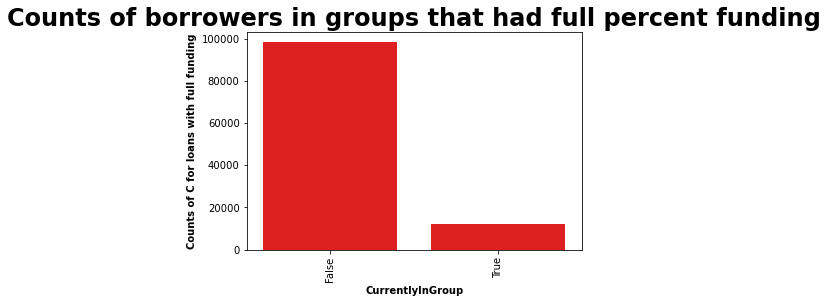

In [96]:
#percent Funded and CurrentlyInGroup for fully funded loans

full_funding('CurrentlyInGroup', 'borrowers in groups')

- Most borrowers not in groups had full funding, but this could be because of the nature of data being analysed, from the exploration of the variable False had alrger proportion than True

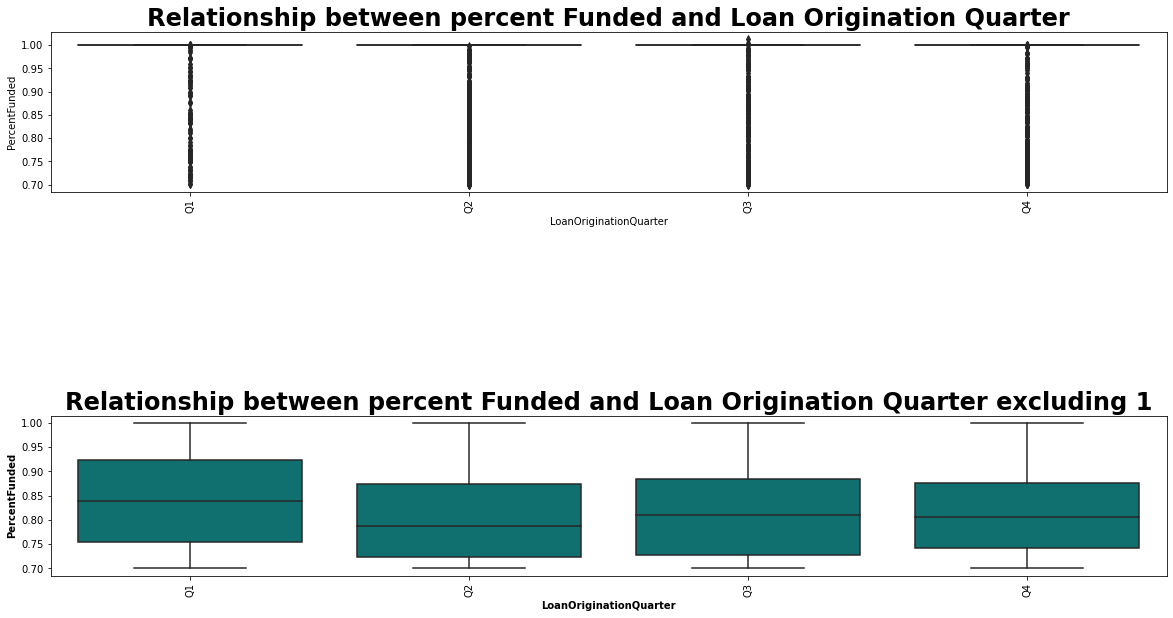

In [101]:
#percent Funded and Loan Origination Quarter

boxplots(20, 10, ['LoanOriginationQuarter'], ['PercentFunded'], df_clean,
         ['Relationship between percent Funded and Loan Origination Quarter', 
          'Relationship between percent Funded and Loan Origination Quarter excluding 1'],
          multiple_subplots = True, \
         use_another_data = True, another_data = not_including_1)

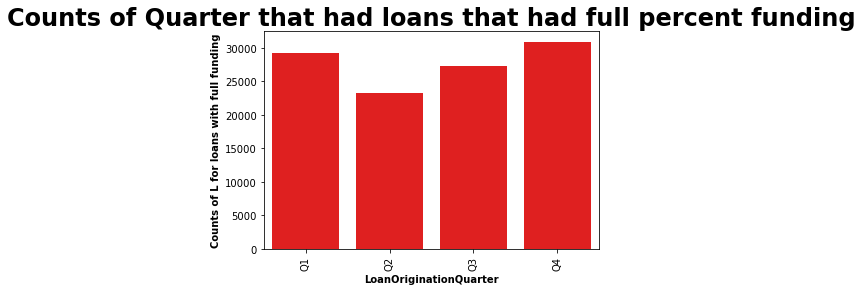

In [102]:
#percent Funded and Loan Origination Quarter for fully funded loans

full_funding('LoanOriginationQuarter', 'Quarter that had loans')

- Since this is comparable to how the Quarter Variable is distributed, I believe they have no bearing on whether it will be completely funded or not.

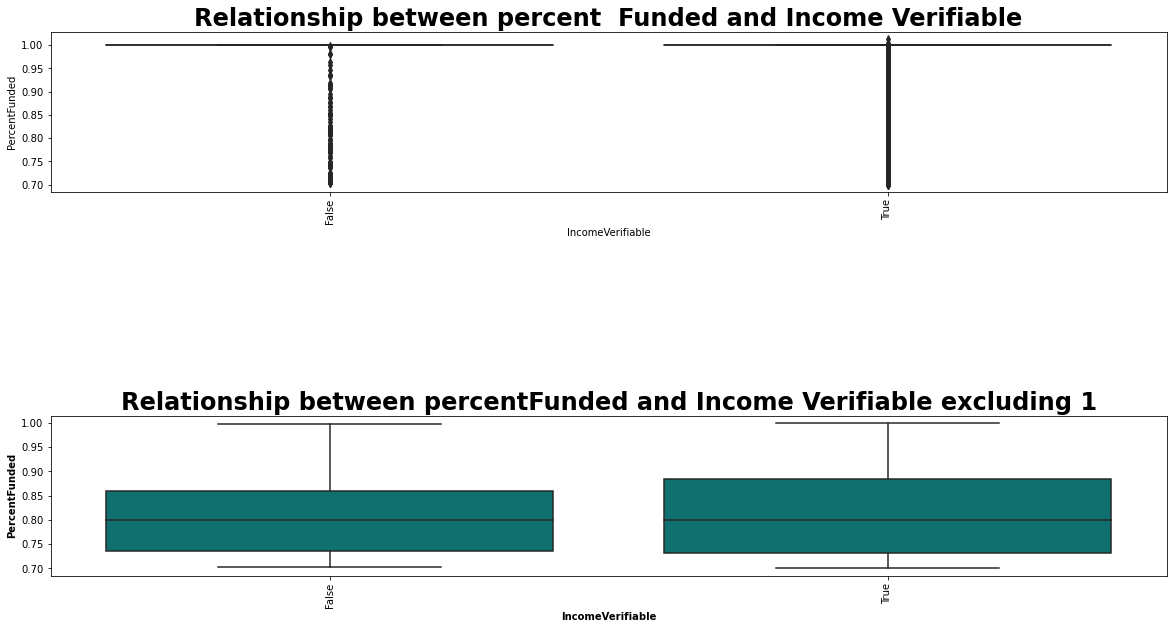

In [105]:
#percent Funded and Income Verifiable

boxplots(20, 10, ['IncomeVerifiable'], ['PercentFunded'], df_clean,
         ['Relationship between percent  Funded and Income Verifiable', 
          'Relationship between percentFunded and Income Verifiable excluding 1'],
          multiple_subplots = True, \
         use_another_data = True, another_data = not_including_1)

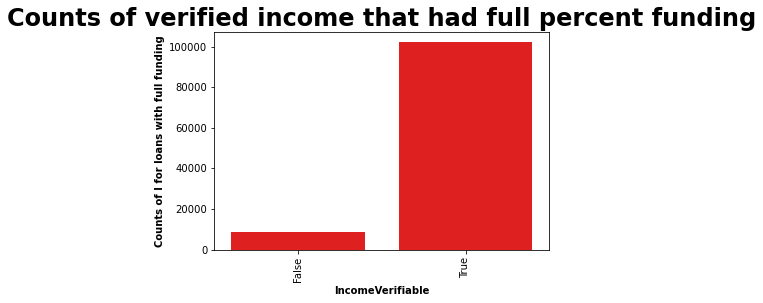

In [106]:
#Relationship between percent Funded and Income Verifiable for fully funded loans

full_funding('IncomeVerifiable', 'verified income')

- I believe they have no bearing on whether it will be completely funded or not because this is comparable to the distribution of the Income Verifiable Variable, yet the majority of fully financed borrowers had Income Verified.

In [107]:
def heatmap(x_data, y_data, number_of_bins, fig_size,more_subplot = False, x_data2 = None):

    
    plt.figure(figsize = fig_size)
    plt.subplot(211) if more_subplot else plt.subplot(111)
    no_of_bins_x = not_including_1[x_data].max()/ number_of_bins
    no_of_bins_y = not_including_1[y_data].max()/ number_of_bins
    bins_x = np.arange(not_including_1[x_data].min(), 
                 not_including_1[x_data].max() +  no_of_bins_x, no_of_bins_x)
    bins_y = np.arange(not_including_1[y_data].min(), 
                 not_including_1[y_data].max() +  no_of_bins_y, no_of_bins_y)
    plt.hist2d(x = x_data, y = y_data, data = not_including_1,
           bins = [bins_x, bins_y], cmap = 'viridis_r', )
    plt.title(f'Relationship between percentFunded and {x_data}')
    plt.xlabel(f'{x_data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'{y_data}', fontdict = {'weight': 'bold'})
    
    if more_subplot:
        plt.subplot(212)
        no_of_bins_x = not_including_1[x_data2].max()/ number_of_bins
        bins_x = np.arange(not_including_1[x_data2].min(), 
                 not_including_1[x_data2].max() +  no_of_bins_x, no_of_bins_x)
        plt.hist2d(x = x_data2, y = y_data, data = not_including_1,
           bins = [bins_x, bins_y], cmap = 'viridis_r', )
        plt.title(f'Relationship between percentFunded and {x_data2}')
        plt.xlabel(f'{x_data2}', fontdict = {'weight': 'bold'})
        plt.ylabel(f'{y_data}', fontdict = {'weight': 'bold'})
    
    plt.subplots_adjust(hspace = 0.9)
    plt.colorbar();

In [108]:
def contvcont(x_data, y_data, number_of_bins, fig_size,more_subplot = False, x_data2 = None):
        
    plt.figure(figsize = fig_size)
    plt.subplot(211) if more_subplot else plt.subplot(111)
    no_of_bins_x = not_including_1[x_data].max()/ number_of_bins
    no_of_bins_y = not_including_1[y_data].max()/ number_of_bins
    bins_x = np.arange(not_including_1[x_data].min(), 
                 not_including_1[x_data].max() +  no_of_bins_x, no_of_bins_x)
    bins_y = np.arange(not_including_1[y_data].min(), 
                 not_including_1[y_data].max() +  no_of_bins_y, no_of_bins_y)
    sb.regplot(x = x_data, y = y_data, data = not_including_1,)
    plt.title(f'Relationship between percentFunded and {x_data}')
    plt.xlabel(f'{x_data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'{y_data}', fontdict = {'weight': 'bold'})
    
    if more_subplot:
        plt.subplot(212)
        no_of_bins_x = not_including_1[x_data2].max()/ number_of_bins
        bins_x = np.arange(not_including_1[x_data2].min(), 
                 not_including_1[x_data2].max() +  no_of_bins_x, no_of_bins_x)
        sb.regplot(x = x_data, y = y_data, data = not_including_1)
        plt.title(f'Relationship between percentFunded and {x_data2}')
        plt.xlabel(f'{x_data}', fontdict = {'weight': 'bold'})
        plt.ylabel(f'{y_data}', fontdict = {'weight': 'bold'})
    
    plt.subplots_adjust(hspace = 0.9)

In [113]:
def full_fund_hist(data, number_of_bins, fig_size,more_subplot = False, data2 = None, log_plot = False):
   
    full_funding = df_loan_copy[df_loan_copy['PercentFunded'] == 1]
    plt.figure(figsize = fig_size) 
    plt.subplot(121) if more_subplot else plt.subplot(111)
    no_of_bins = full_funding[data].max()/ number_of_bins
    bins = np.arange(full_funding[data].min(), 
                 full_funding[data].max() +  no_of_bins, no_of_bins)
    sb.histplot(x = data, data = full_funding, bins = bins, stat = 'density')
    plt.title(f'{data} with full percentFunded')
    plt.xlabel(f'{data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'frequency of {data} for fully funded loans', fontdict = {'weight': 'bold'})
    
    if more_subplot:
        plt.subplot(122)
        if log_plot:
            no_of_bins = np.log(full_funding[data] + 1).max()/ number_of_bins
            bins = np.arange(np.log(full_funding[data] + 1).min(), 
                 np.log(full_funding[data] + 1).max() +  no_of_bins, no_of_bins)
            plt.xscale('log')
            plt.xlim(0.9e0, 2e1)
            plt.xticks([0.9e0, 2e0, 4e0, 6e0, 8e0, 1e1], ['0', '2', '4', '6', '8', '10'])
        else:
            no_of_bins = full_funding[data2].max()/ number_of_bins
            bins = np.arange(full_funding[data2].min(), 
                 full_funding[data2].max() +  no_of_bins, no_of_bins)
        sb.histplot(x = data if log_plot else data2
                    , data = full_funding, bins = bins, stat = 'density')
        plt.xlabel(f'{data}', fontdict = {'weight': 'bold'})
        plt.ylabel(f'frequency of {data} for fully funded loans', fontdict = {'weight': 'bold'})
        
        if log_plot:
            plt.title(f'logarithm plot of {data} with full percentFunded')
        else:
            plt.title(f'logarithm plot of {data2} with full percentFunded')
    plt.subplots_adjust(wspace = 0.9)

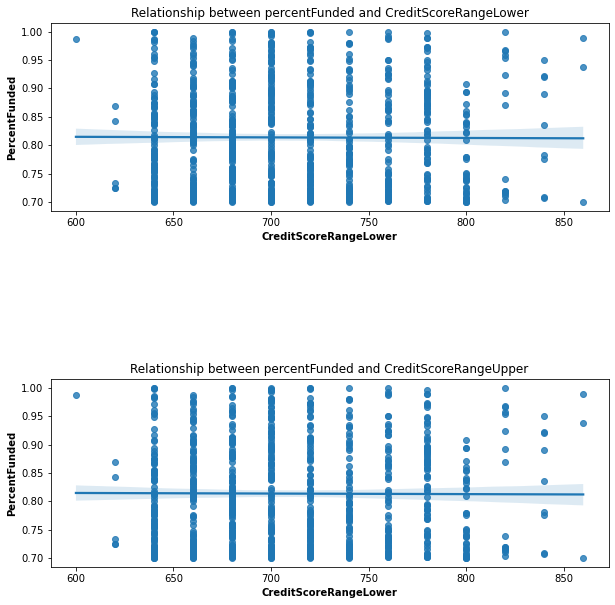

In [109]:
contvcont('CreditScoreRangeLower', 'PercentFunded', 70, (10,10),more_subplot = True, x_data2 = 'CreditScoreRangeUpper')

- The credit score range for completely funded loans does not correlate with the percent funded.

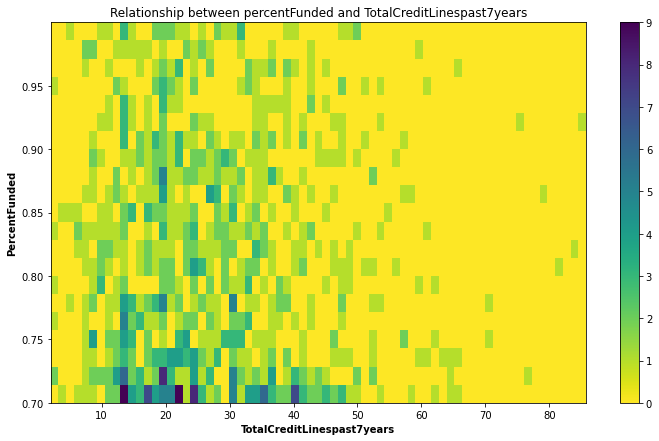

In [111]:
heatmap('TotalCreditLinespast7years', 'PercentFunded', 70, (12, 7))

- The majority of credit lines were between 10 and 40 in number, although 20 to 40 had the highest financing on average.

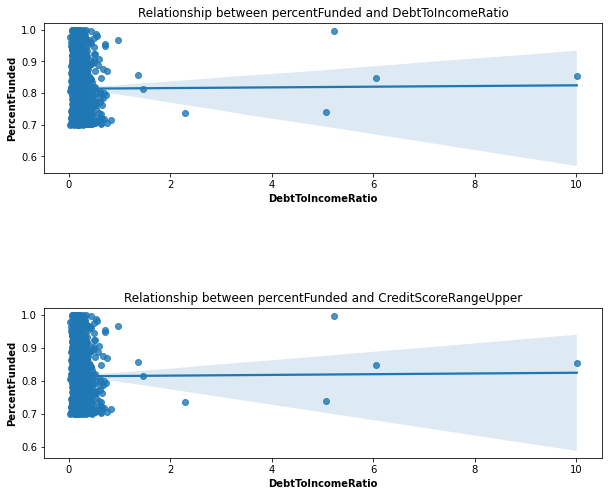

In [114]:
contvcont('DebtToIncomeRatio', 'PercentFunded', 50, (10,8),\
          more_subplot = True, x_data2 = 'CreditScoreRangeUpper')

In [118]:
def correlation(fig_size, data, multiple_subplot =  False):
    
    plt.figure(figsize = fig_size)
    plt.subplot(121) if multiple_subplot else plt.subplots(111)
    sb.regplot(x = data, y = 'PercentFunded', data = df_clean)
    plt.title(f'Relationship between PercentFunded \nand {data}')
    plt.xlabel(f'{data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'PercentFunded', fontdict = {'weight': 'bold'})
    if multiple_subplot:
        plt.subplot(122)
        sb.regplot(x = data, y = 'PercentFunded', data = not_including_1)
        plt.title(f'Relationship between PercentFunded \nand {data} of loans'
                  'that were not fully funded')
        plt.subplots_adjust(wspace  = 0.9)
        plt.xlabel(f'{data}', fontdict = {'weight': 'bold'})
        plt.ylabel(f'PercentFunded', fontdict = {'weight': 'bold'})

In [119]:
def fully_funded_for_numeric(fig_size, column):
    
    plt.figure(figsize = fig_size)
    plt.subplot(111)
    data_to_use = df_clean[df_clean['PercentFunded'] == 1]
    no_of_bins = data_to_use[column].max()/ 50
    bins = np.arange(data_to_use[column].min(), 
                 data_to_use[column].max() +  no_of_bins, no_of_bins)
    sb.histplot(x = column, data = data_to_use, bins = bins)
    plt.xlabel(f'{column}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'Frequency of {column} for fully funded loans', fontdict = {'weight': 'bold'})

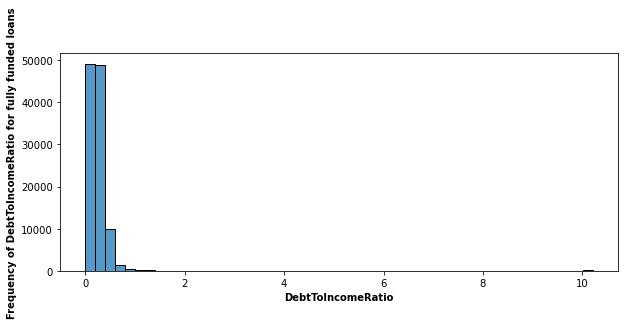

In [120]:
fully_funded_for_numeric((10,4), 'DebtToIncomeRatio')

- Monthly payment exhibited a low correlation with % for loans that weren't fully Funded

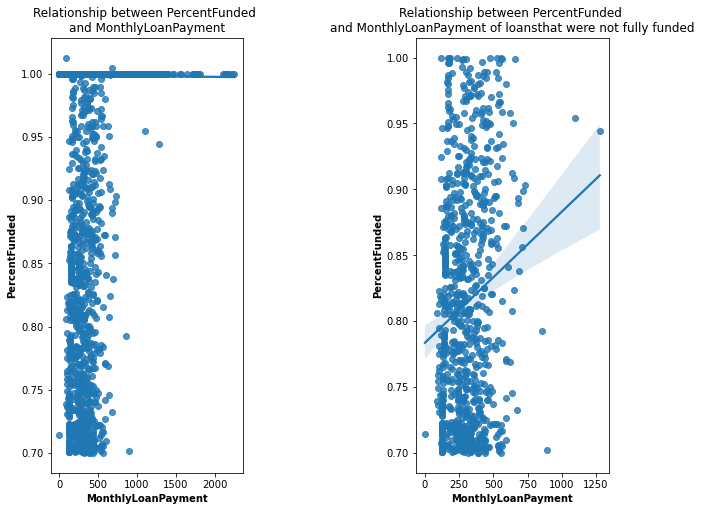

In [122]:
correlation((10, 8), 'MonthlyLoanPayment', multiple_subplot = True)

- For non-full-funded loans, Monthly payment had a reasonable high positive correlation with percentFunded

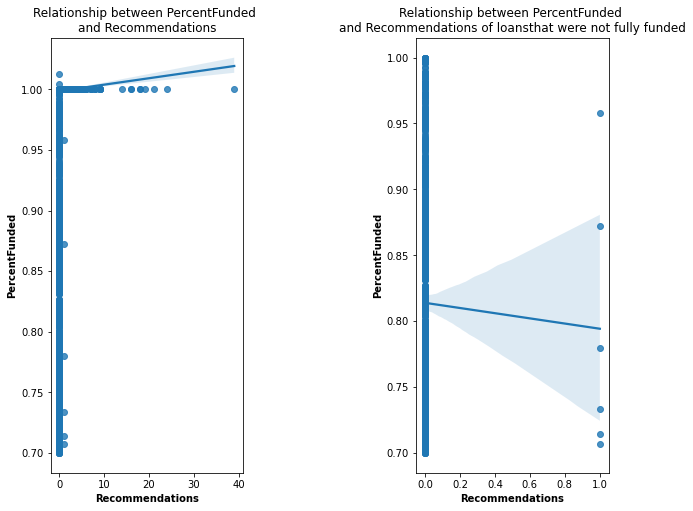

In [123]:
correlation((10, 8), 'Recommendations', multiple_subplot = True)

- For non-fully funded loans, Recommendations had a little negative correlation with percentFunded

In [125]:
def recommendations(column):
    
    '''To plot distribution of numeric data on recommendations for loans not fully funded
    
   column: str, The numeric data to plot, 
    '''
    
    fig, ax = plt.subplots(1,2)
    reco = not_including_1['Recommendations'].unique()
    for i, ax in zip(reco, ax.ravel()):
        no_recommendation = not_including_1[not_including_1['Recommendations'] == i]
        sb.boxplot(x = 'Recommendations', y = column, data = no_recommendation, ax = ax)
        plt.text(x = 1, y = 0.8, s = 'The only number of recommendation of loans that do not have '
                 'full funding are 0 and 1')
        ax.set_xlabel('Recommendation', fontdict = {'weight': 'bold'})
        ax.set_ylabel(f'PercentFunded', fontdict = {'weight': 'bold'})
    plt.title(f'Relationship between Recomendations and {column} of not fully funded loans',
                 fontdict = {'weight':'bold'})
    plt.subplots_adjust(wspace = 0.9)

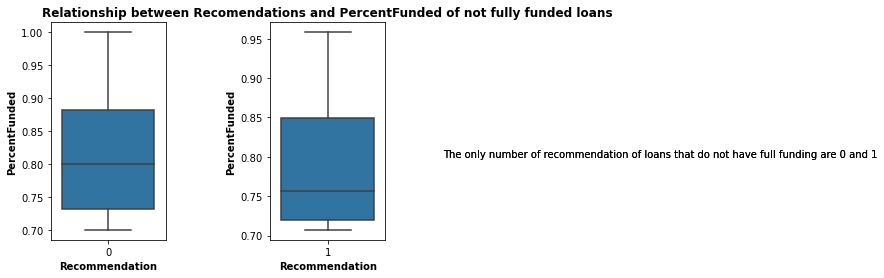

In [126]:
recommendations('PercentFunded')

- For Recommendation of 1 most Funding were between 72% and 75%

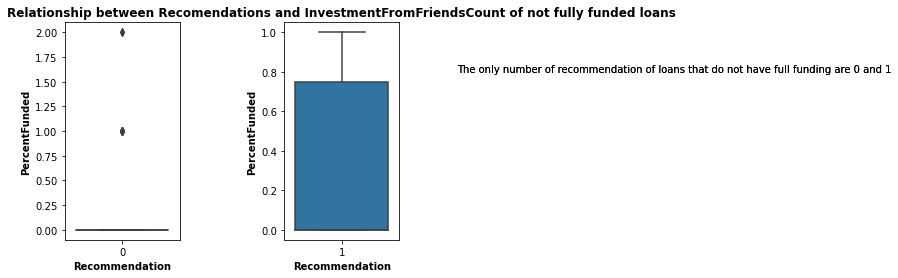

In [127]:
recommendations('InvestmentFromFriendsCount')

- Given that recommendations of 1 have a variety of funded percentages, despite the distribution being negatively biassed, this implies that recommendations of may have a link with friends that invest.

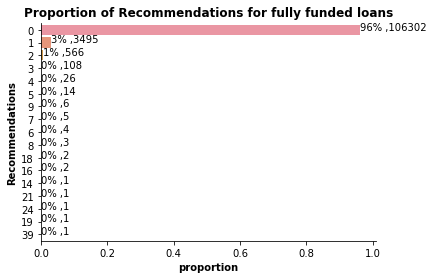

In [129]:
full_funded = df_clean[df_clean['PercentFunded'] == 1]
ax = plt.subplot(111)
prop = full_funded['Recommendations'].value_counts() / full_funded['Recommendations'].shape[0]
label = [str(x) for x in full_funded['Recommendations'].value_counts().index.to_list()]
sb.barplot(x = prop, y = label, ax  = ax)
for i in range(len(label)):
    prop = full_funded['Recommendations'].value_counts().iloc[i] / \
    full_funded['Recommendations'].shape[0]
    percent = prop * 100
    value = full_funded['Recommendations'].value_counts().iloc[i]
    plt.text(y = i, x = prop, s = '{:0.0f}% ,{}'.format(percent, value))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Proportion of Recommendations for fully funded loans', fontdict = {'Weight': 'bold'},
          pad = 7)
plt.xlabel('proportion', fontdict = {'weight':'bold'})
plt.ylabel('Recommendations', fontdict = {'weight':'bold'});

- Since the majority of loans did not receive recommendations, the percentage of funding is unaffected.

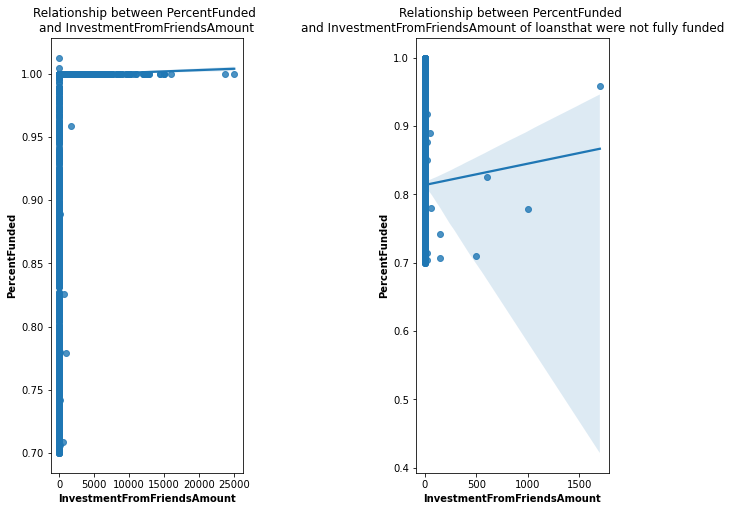

In [130]:
correlation((10, 8), 'InvestmentFromFriendsAmount', multiple_subplot = True)

- InvestmentsfromfriendsAMount has very little correlation with PercentFunded, for not fully funded loans

In [131]:
def relation(x_data, y_data, data):
    
    '''To plot relationship between numeric data
    
   x_data: str, The numeric data to plot on x-axis, 
   y_data: str, The numeric data to plot on y-axis, 
   data: DataFrame, The data to plot from
    '''
    
    sb.regplot(x = x_data, y = y_data, data = data);
    plt.title(f'relationship between {x_data} and {y_data}', fontdict = {'weight':'bold'}, pad = 7)
    plt.xlabel(f'{x_data}', fontdict = {'weight':'bold'})
    plt.ylabel(f'{y_data}', fontdict = {'weight':'bold'});

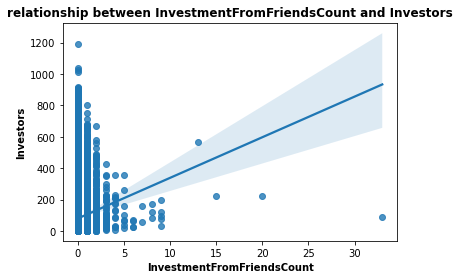

In [132]:
relation('InvestmentFromFriendsCount', 'Investors', df_clean)

- High correlattion (expected)

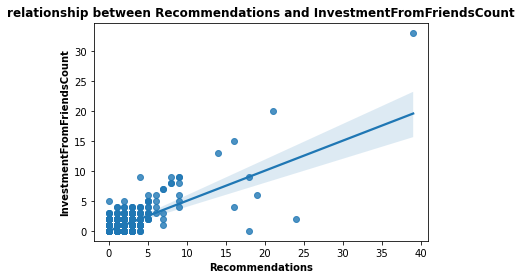

In [133]:
relation('Recommendations', 'InvestmentFromFriendsCount', df_clean)

- High correlation between Recommendations and friends that invest

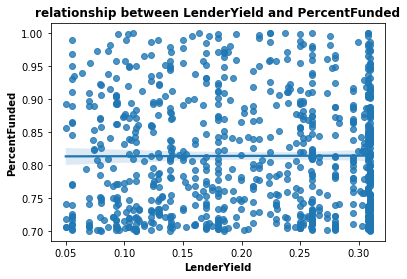

In [134]:
relation('LenderYield', 'PercentFunded', not_including_1)

- Little to no correlation between LenderYield and PercentFunded

In [135]:
def cat_rel(column, hue):
    
    '''To plot counts of two categorical varable
    
   x_data: str, The numeric data to plot on x-axis, 
   y_data: str, The numeric data to plot on y-axis, 
   data: DataFrame, The data to plot from
    '''
    
    sb.countplot(x = column, hue = hue, data = df_clean)
    plt.xticks(rotation = 90)
    plt.title(f'Proportion of {column} and {hue}', fontdict = {'weight':'bold'}, pad = 7)
    plt.xlabel(f'{column}', fontdict = {'weight':'bold'})
    plt.ylabel(f'counts of {column} and {hue}', fontdict = {'weight':'bold'});

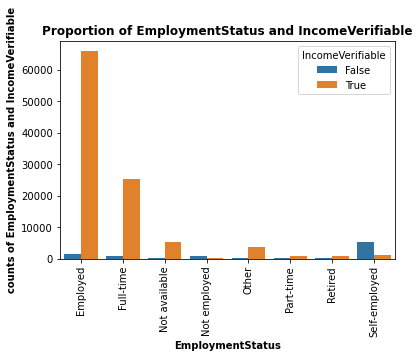

In [136]:
cat_rel('EmploymentStatus', 'IncomeVerifiable',)

- Most full-time employees and borrowers had incomes that could be verified, while the majority of self-employed people lacked such proof.


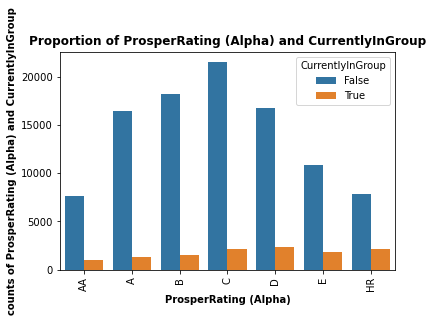

In [137]:
cat_rel('ProsperRating (Alpha)', 'CurrentlyInGroup',)

- across all ratings, most borrowers were not in groups

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The correlation between the variable and the other variables was very low almost 0

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- High correlation between 'Recommendations'and 'friends that invest'
- Little to no correlation between LendeYield and PercentFunded

### Multivariate Exploration

In [138]:
def vari(col = None, numerical = False, facet = False, minimum = None, pad = None):
    
    '''To plot relationship between LenderYield, PercentFunded and one categorical variable or
     numerical variable
    
    col: str, categorical variable to plot, 
    numerical: str, numerical variable to plot, 
    facet: bool, if it should be facet plot, 
    minimum: int, minimum value for colorbar,
    pad = The pad for title
    '''
    
    plt.figure(figsize = (10,5))
    if numerical:
        plt.scatter(data = not_including_1, x = 'LenderYield', y = 'PercentFunded', c = col, \
           cmap = 'Accent', vmin = minimum)
        plt.colorbar(label = col)
    elif facet:
        g = sb.FacetGrid(data = not_including_1, col = col, col_wrap =3)
        g.map(sb.regplot, 'LenderYield', 'PercentFunded')
        plt.title(f'Relationship between LenderYield, PercentFunded and {col}',
                 fontdict = {'weight': 'bold'}, pad = pad)
    else:
        sb.scatterplot(x = 'LenderYield', y = 'PercentFunded', data = not_including_1,\
                       hue = col, s = 70);
    if not facet:
        plt.title(f'Relationship between LenderYield, PercentFunded and {col}',
                 fontdict = {'weight': 'bold'}, pad  = 10)
        plt.xlabel('LenderYield', fontdict = {'weight':'bold'})
        plt.ylabel('PercentFunded', fontdict = {'weight':'bold'});
    plt.legend(loc = 'right', bbox_to_anchor = (1.5,1))

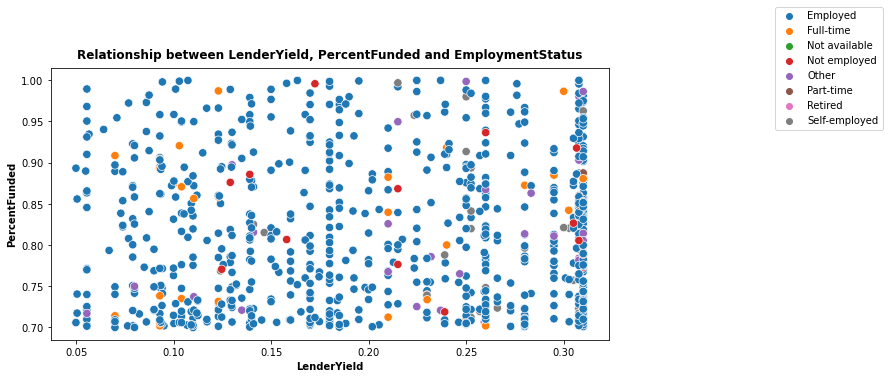

In [139]:
vari(col = 'EmploymentStatus')

- Loans of Most borrowers that are not employed, that have employment status of other have more lender yield, Part-time had high LenderYield and Percent Funded of about 87%, Self-employed has high LenderYield

No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

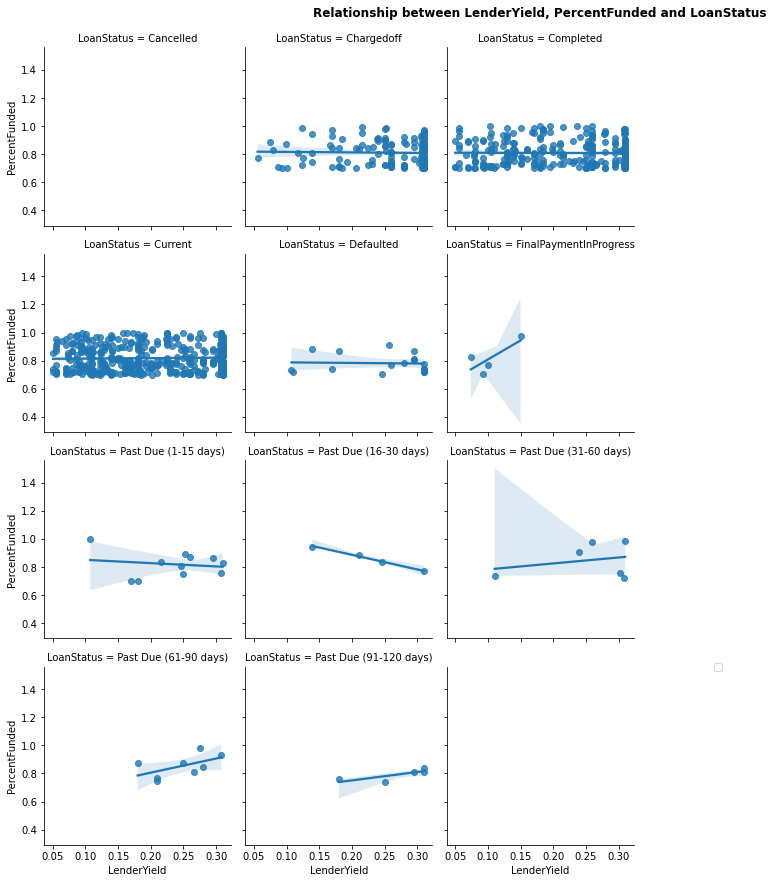

In [140]:
vari('LoanStatus', facet = True, pad = 650)

- even across the LoanStatus feature, the correlation between PercentFunded and lender yield is neutral or almost neutral.

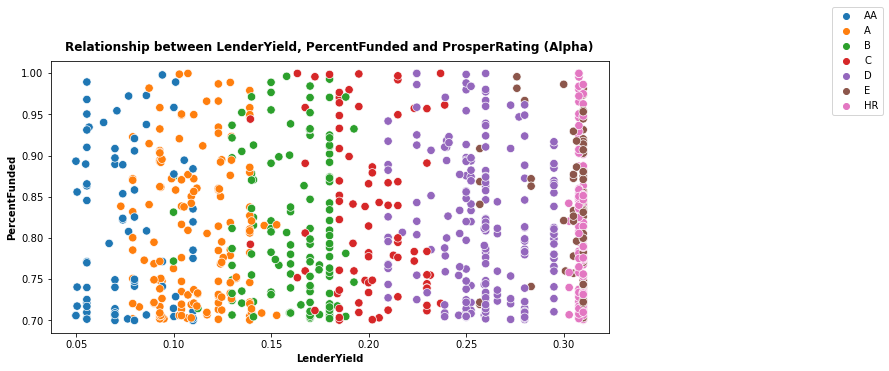

In [141]:
vari('ProsperRating (Alpha)')

- All ratings had the same range of PercentFunded except E that had the least PercentFUnded to be above 70%, From AA to HR there's decrease in LenderYield

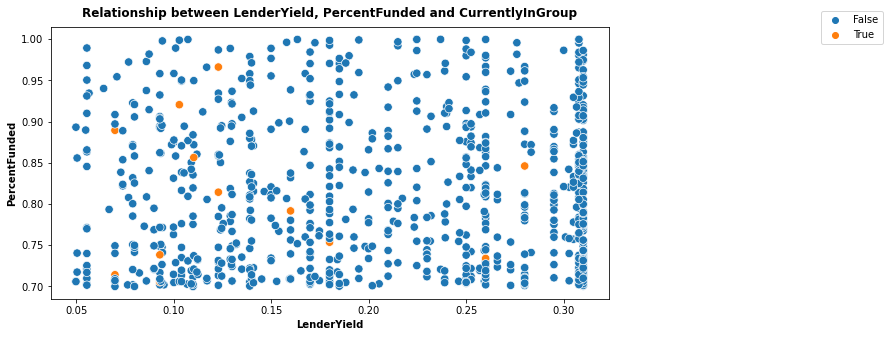

In [142]:
vari('CurrentlyInGroup')

- Most loans of borrowers in groups had lower Lender Yield, but for not fully funded loans their percentfunded is between 72% and 97%.

No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

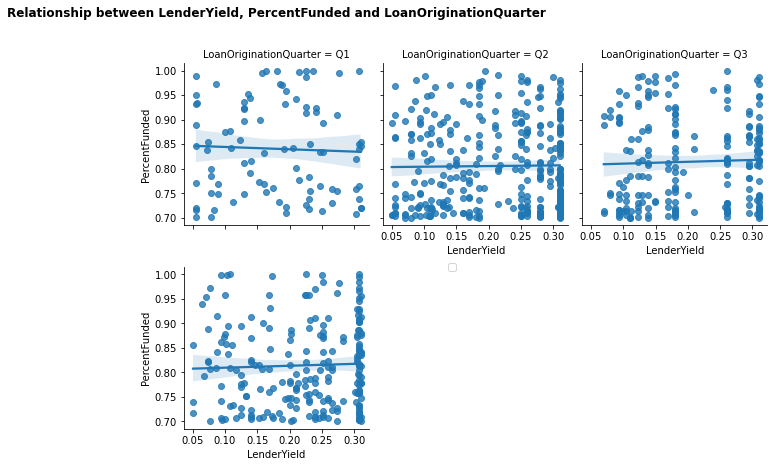

In [143]:
vari(col = 'LoanOriginationQuarter', facet= True, pad = 250)

- even across the LoanOriginationQuarter feature, the correlation between PercentFunded and lender yiels is neutral or almost neutral.

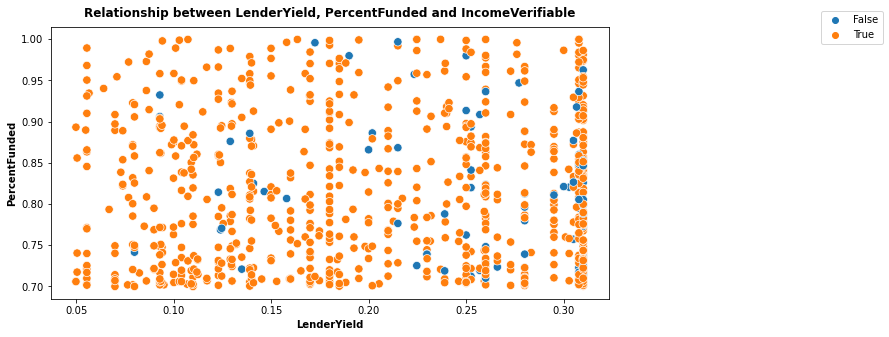

In [144]:
vari(col = 'IncomeVerifiable')

- Most borrowers with Income not verifiabl had high LenderYield

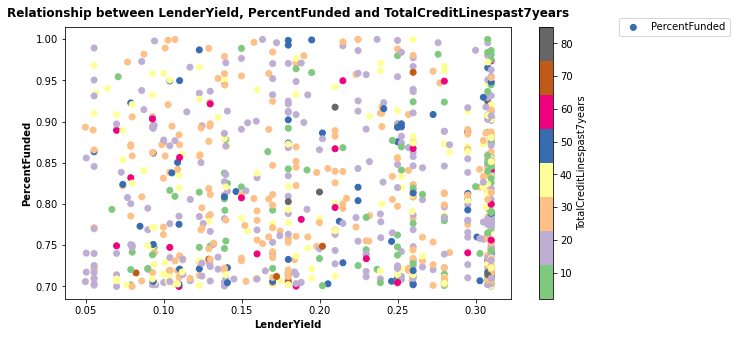

In [145]:
vari(numerical= True, col= 'TotalCreditLinespast7years')

- Most loans with totalcredit between 65 and 75 have low Funds percent less than 75%, loans with totalcredit between 35 and 45 have high Funds percent above than 85%

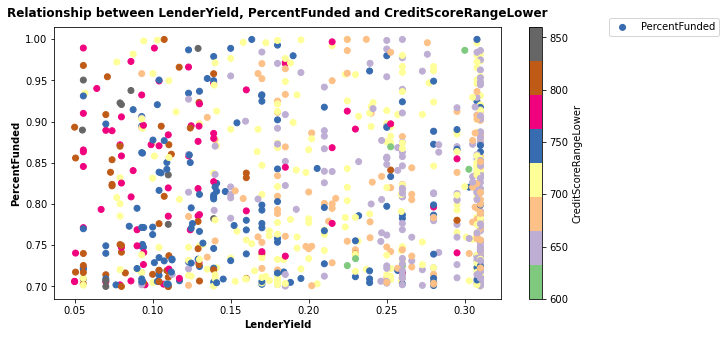

In [146]:
vari(numerical= True, col= 'CreditScoreRangeLower')

- Most loans of Credit score between 625 to 725 have higher yields,Most loans of Credit score from730 above had low lender yield

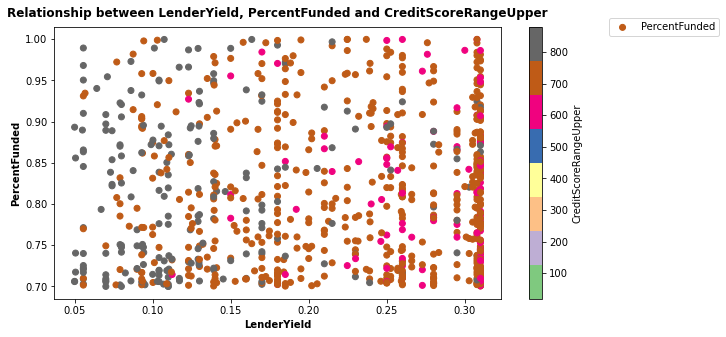

In [147]:
vari(numerical= True, col = 'CreditScoreRangeUpper', minimum = 19)

- Most loans of Credit score from 750 and above have lower yields,Most loans of Credit score between 550 and 750 had high lender yield

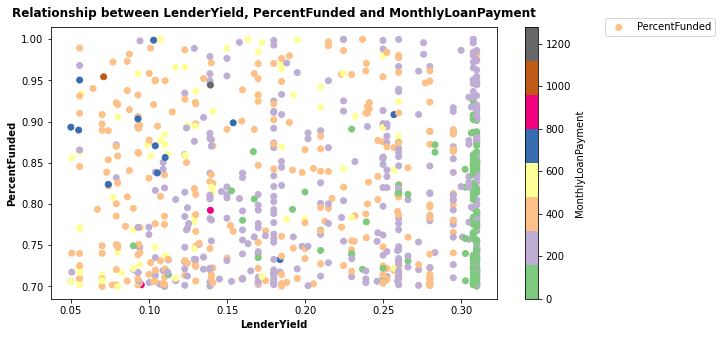

In [148]:
vari(numerical= True, col = 'MonthlyLoanPayment')

- most loans with Monthly Loan payments between 650 and 800 have high PercentFunded and lower LenderYield
- most loans with Monthly Loan payments between 300 and 500 have lower
- most loans with Monthly Loan payments between 500 to 650 have high PercentFunded and lower LenderYield

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- There is a strong relationship between CurrentlyInGroup and lenderYield when plotted with PercentFunded
- There is a strong relationship between CreditScoreRange and lenderYield when plotted with PercentFunded
- There is a strong relationship between MonthlyLoanPayment and lenderYield when plotted with PercentFunded

### Were there any interesting or surprising interactions between features?

- Higher credit score had lower lender yields and lower credit score had higher lender yields

## Conclusions

One of the interesting facts found when examining the distribution of interesting univariables was that California State has the most borrowers. When I looked at the borrowers' work status, I found that the majority of them were either employed or had full-time jobs. Further research into their source of income led me to the conclusion that they typically earn between $25,000 and $74,999 per month, with a right-skewed monthly income distribution, and that they typically make less than $30,000. Additionally, their income ratio is right-skewed.
As I continued my bivariance analysis to look at the links between the two variables in the data, I found that there was a strong correlation between "Recommendations" and "friends that invest," but little to no association between LenderYield and PercentFunded.
Finally, regarding Multivariant exploration,
- CurrentlyInGroup and lenderYield have a significant correlation when plotted with PercentFunded.
- When plotted with PercentFunded, CreditScoreRange and lenderYield have a strong correlation.
- When plotted with PercentFunded, MonthlyLoanPayment and lenderYield show a strong relationship.


## Limitations

- The important variable, PerentFunded, did not significantly correlate with the other factors. The majority of the observations had PercentFunding values of 1.0, therefore it would be preferable if more varied data were gathered.